
#The implementation of different LSTM models including Encoder-Decoder based approaches for Rainfall-Runoff Modeling for Awash River in Ethiopia.


The data used to model the system are the streamflow, precipitation, temperature, wind speed, and humudity at different guaging stations in the upper Awash river basin. 28 years of daily recorded data is used.

In [1]:
from google.colab import drive
drive.mount('/content/drive') 

Mounted at /content/drive


# Import Libraries

In [2]:
import pandas as pd
import datetime as dt  # Python standard library datetime  module
import matplotlib.pyplot as plt
import keras
from pandas import read_csv,concat,DataFrame,datetime
import numpy
import numpy as np
from numpy import concatenate

import math
from math import sqrt

from sklearn.preprocessing import MinMaxScaler,LabelEncoder
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score,mean_squared_error,mean_absolute_error

from tensorflow.keras import regularizers,optimizers
from tensorflow.keras.layers import BatchNormalization,Dense, Dropout, LSTM, GRU, TimeDistributed, Input, RNN,GRUCell,Lambda,Bidirectional,Concatenate,LSTMCell
from tensorflow.keras.models import Sequential,Model
from keras.callbacks import Callback
from tensorflow.keras import backend as K

from IPython.display import SVG
from tensorflow.keras.utils import model_to_dot

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """


In [3]:
try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass
import tensorflow as tf
tf.__version__

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


'2.8.2'

In [ ]:
tf.test.is_gpu_available()    #Tru if Gpu is avalible

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.


True

In [ ]:
!cat /proc/cpuinfo # Check the processing hardware

# Data preparation and processing

The Path below goes to my mounted GoogleDrive - It should be changed based on your GoogleDrive directory.

In [4]:
path= "/content/drive/MyDrive/1981_final/"

The Datasets were slightly modified before uploading them.

1) Missing data was replaced by taking the average of previous 3 years on similar date of record.

#Stream flow data for 3 stations 1) Berga station 2)Akaki Station 3) Hombole station (this is the target station to predict future streamflow)

In [5]:
sf_berga = pd.read_csv(path + 'berga.csv')
sf_akaki = pd.read_csv(path + 'Akaki.csv')
sf_hom = pd.read_csv(path + 'hombole.csv')

#Precipitation at 11 stations 1) Addis ababa 2) Hombole 3) Asgori 4) Sendefa 5) Tulubolo 6)Sebeta 7)Addis Alem 8) Boneya 9) Kimoye 10) Guranda 11) Ginchi

In [6]:
pcp_aa = pd.read_csv(path + 'pcp_aa.csv') # preciptation at addis ababa station
pcp_hom = pd.read_csv(path + 'pcp_hom.csv') # preciptation at hombole station
pcp_asgori = pd.read_csv(path + 'pcp_asgori.csv') # preciptation at asgori station
pcp_sendefa = pd.read_csv(path + 'pcp_sendefa.csv') # preciptation at sendefa station
pcp_tulubolo = pd.read_csv(path + 'pcp_tulubolo.csv') # preciptation at tulubolo station

pcp_sebeta = pd.read_csv(path + 'pcp_sebeta.csv') # preciptation at sebeta station
pcp_aalem = pd.read_csv(path + 'pcp_aalem.csv') # preciptation at addis alem station
pcp_boneya = pd.read_csv(path + 'pcp_boneya.csv') # preciptation at boneya station
pcp_kimoye = pd.read_csv(path + 'pcp_kimoye.csv') # preciptation at kimoye station
pcp_guranda = pd.read_csv(path + 'pcp_guranda.csv') # preciptation at guranda meta station

pcp_ginchi = pd.read_csv(path + 'pcp_ginchi.csv') # preciptation at ginchi station


#Average of (min and max) temprature at 11 stations 1) Addis ababa 2) Hombole 3) Asgori 4) Sendefa 5) Tulubolo 6)Sebeta 7)Addis Alem 8) Boneya 9) Kimoye 10) Guranda 11) Ginchi

In [7]:
temp_aa = pd.read_csv(path + 'tmp_aa.csv') # temprature at addis ababa station
temp_hom = pd.read_csv(path + 'tmp_hom.csv') # preciptation at hombole station
temp_asgori = pd.read_csv(path + 'tmp_asgori.csv') # preciptation at asgori station
temp_sendefa = pd.read_csv(path + 'tmp_sendefa.csv') # preciptation at sendefa station
temp_tulubolo = pd.read_csv(path + 'tmp_tulubolo.csv') # preciptation at tulubolo station

temp_sebeta = pd.read_csv(path + 'tmp_sebeta.csv') # preciptation at sebeta station
temp_aalem = pd.read_csv(path + 'tmp_aalem.csv') # preciptation at addis alem station
temp_boneya = pd.read_csv(path + 'tmp_boneya.csv') # preciptation at boneya station
temp_kimoye = pd.read_csv(path + 'tmp_kimoye.csv') # preciptation at kimoye station
temp_guranda = pd.read_csv(path + 'tmp_guranda.csv') # preciptation at guranda meta station

temp_ginchi = pd.read_csv(path + 'tmp_ginchi.csv') # preciptation at ginchi station

#Humudity at at 11 stations 1) Addis ababa 2) Hombole 3) Asgori 4) Sendefa 5) Tulubolo 6)Sebeta 7)Addis Alem 8) Boneya 9) Kimoye 10) Guranda 11) Ginchi

In [8]:
hmd_aa = pd.read_csv(path + 'hmd_aa.csv') # humudity at addis ababa station
hmd_hom = pd.read_csv(path + 'hmd_hom.csv') # preciptation at hombole station
hmd_asgori = pd.read_csv(path + 'hmd_asgori.csv') # preciptation at asgori station
hmd_sendefa = pd.read_csv(path + 'hmd_sendefa.csv') # preciptation at sendefa station
hmd_tulubolo = pd.read_csv(path + 'hmd_tulubolo.csv') # preciptation at tulubolo station

hmd_sebeta = pd.read_csv(path + 'hmd_sebeta.csv') # preciptation at sebeta station
hmd_aalem = pd.read_csv(path + 'hmd_aalem.csv') # preciptation at addis alem station
hmd_boneya = pd.read_csv(path + 'hmd_boneya.csv') # preciptation at boneya station
hmd_kimoye = pd.read_csv(path + 'hmd_kimoye.csv') # preciptation at kimoye station
hmd_guranda = pd.read_csv(path + 'hmd_guranda.csv') # preciptation at guranda meta station

hmd_ginchi = pd.read_csv(path + 'hmd_ginchi.csv') # preciptation at ginchi station

#Wind Speed at 11 stations 1) Addis ababa 2) Hombole 3) Asgori 4) Sendefa 5) Tulubolo 6)Sebeta 7)Addis Alem 8) Boneya 9) Kimoye 10) Guranda 11) Ginchi

In [9]:
wnd_aa = pd.read_csv(path + 'wnd_aa.csv') # wind speed at addis ababa station
wnd_hom = pd.read_csv(path + 'wnd_hom.csv') # preciptation at hombole station
wnd_asgori = pd.read_csv(path + 'wnd_asgori.csv') # preciptation at asgori station
wnd_sendefa = pd.read_csv(path + 'wnd_sendefa.csv') # preciptation at sendefa station
wnd_tulubolo = pd.read_csv(path + 'wnd_tulubolo.csv') # preciptation at tulubolo station

wnd_sebeta = pd.read_csv(path + 'wnd_sebeta.csv') # preciptation at sebeta station
wnd_aalem = pd.read_csv(path + 'wnd_aalem.csv') # preciptation at addis alem station
wnd_boneya = pd.read_csv(path + 'wnd_boneya.csv') # preciptation at boneya station
wnd_kimoye = pd.read_csv(path + 'wnd_kimoye.csv') # preciptation at kimoye station
wnd_guranda = pd.read_csv(path + 'wnd_guranda.csv') # preciptation at guranda meta station

wnd_ginchi = pd.read_csv(path + 'wnd_ginchi.csv') # preciptation at ginchi station

#Make date as index

In [10]:
## format datetime column
sf_hom["date"] = pd.to_datetime(sf_hom['date'])
sf_hom = sf_hom.set_index(['date'])
sf_berga["date"] = pd.to_datetime(sf_berga['date'])
sf_berga = sf_berga.set_index(['date'])
sf_akaki["date"] = pd.to_datetime(sf_akaki['date'])
sf_akaki = sf_akaki.set_index(['date'])

## format datetime column
pcp_aa["date"] = pd.to_datetime(pcp_aa['date'])
pcp_aa = pcp_aa.set_index(['date'])
pcp_hom["date"] = pd.to_datetime(pcp_hom['date'])
pcp_hom = pcp_hom.set_index(['date'])
pcp_asgori["date"] = pd.to_datetime(pcp_asgori['date'])
pcp_asgori = pcp_asgori.set_index(['date'])
pcp_sendefa["date"] = pd.to_datetime(pcp_sendefa['date'])
pcp_sendefa = pcp_sendefa.set_index(['date'])
pcp_tulubolo["date"] = pd.to_datetime(pcp_tulubolo['date'])
pcp_tulubolo = pcp_tulubolo.set_index(['date'])
pcp_sebeta["date"] = pd.to_datetime(pcp_sebeta['date'])
pcp_sebeta = pcp_sebeta.set_index(['date'])
pcp_aalem["date"] = pd.to_datetime(pcp_aalem['date'])
pcp_aalem = pcp_aalem.set_index(['date'])
pcp_boneya["date"] = pd.to_datetime(pcp_boneya['date'])
pcp_boneya = pcp_boneya.set_index(['date'])
pcp_kimoye["date"] = pd.to_datetime(pcp_kimoye['date'])
pcp_kimoye = pcp_kimoye.set_index(['date'])
pcp_guranda["date"] = pd.to_datetime(pcp_guranda['date'])
pcp_guranda = pcp_guranda.set_index(['date'])
pcp_ginchi["date"] = pd.to_datetime(pcp_ginchi['date'])
pcp_ginchi = pcp_ginchi.set_index(['date'])
## 
temp_aa["date"] = pd.to_datetime(temp_aa['date'])
temp_aa = temp_aa.set_index(['date'])
temp_hom["DATE"] = pd.to_datetime(temp_hom['DATE'])
temp_hom = temp_hom.set_index(['DATE'])
temp_asgori["date"] = pd.to_datetime(temp_asgori['date'])
temp_asgori = temp_asgori.set_index(['date'])
temp_sendefa["date"] = pd.to_datetime(temp_sendefa['date'])
temp_sendefa = temp_sendefa.set_index(['date'])
temp_tulubolo["date"] = pd.to_datetime(temp_tulubolo['date'])
temp_tulubolo = temp_tulubolo.set_index(['date'])
temp_sebeta["date"] = pd.to_datetime(temp_sebeta['date'])
temp_sebeta = temp_sebeta.set_index(['date'])
temp_aalem["date"] = pd.to_datetime(temp_aalem['date'])
temp_aalem = temp_aalem.set_index(['date'])
temp_boneya["date"] = pd.to_datetime(temp_boneya['date'])
temp_boneya = temp_boneya.set_index(['date'])
temp_kimoye["date"] = pd.to_datetime(temp_kimoye['date'])
temp_kimoye = temp_kimoye.set_index(['date'])
temp_guranda["date"] = pd.to_datetime(temp_guranda['date'])
temp_guranda = temp_guranda.set_index(['date'])
temp_ginchi["date"] = pd.to_datetime(temp_ginchi['date'])
temp_ginchi = temp_ginchi.set_index(['date'])
## 
hmd_aa["date"] = pd.to_datetime(hmd_aa['date'])
hmd_aa = hmd_aa.set_index(['date'])
hmd_hom["date"] = pd.to_datetime(hmd_hom['date'])
hmd_hom = hmd_hom.set_index(['date'])
hmd_asgori["date"] = pd.to_datetime(hmd_asgori['date'])
hmd_asgori = hmd_asgori.set_index(['date'])
hmd_sendefa["date"] = pd.to_datetime(hmd_sendefa['date'])
hmd_sendefa = hmd_sendefa.set_index(['date'])
hmd_tulubolo["date"] = pd.to_datetime(hmd_tulubolo['date'])
hmd_tulubolo = hmd_tulubolo.set_index(['date'])
hmd_sebeta["date"] = pd.to_datetime(hmd_sebeta['date'])
hmd_sebeta = hmd_sebeta.set_index(['date'])
hmd_aalem["date"] = pd.to_datetime(hmd_aalem['date'])
hmd_aalem = hmd_aalem.set_index(['date'])
hmd_boneya["date"] = pd.to_datetime(hmd_boneya['date'])
hmd_boneya = hmd_boneya.set_index(['date'])
hmd_kimoye["date"] = pd.to_datetime(hmd_kimoye['date'])
hmd_kimoye = hmd_kimoye.set_index(['date'])
hmd_guranda["date"] = pd.to_datetime(hmd_guranda['date'])
hmd_guranda = hmd_guranda.set_index(['date'])
hmd_ginchi["date"] = pd.to_datetime(hmd_ginchi['date'])
hmd_ginchi = hmd_ginchi.set_index(['date'])
## 
wnd_aa["date"] = pd.to_datetime(wnd_aa['date'])
wnd_aa = wnd_aa.set_index(['date'])
wnd_hom["date"] = pd.to_datetime(wnd_hom['date'])
wnd_hom = wnd_hom.set_index(['date'])
wnd_asgori["date"] = pd.to_datetime(wnd_asgori['date'])
wnd_asgori = wnd_asgori.set_index(['date'])
wnd_sendefa["date"] = pd.to_datetime(wnd_sendefa['date'])
wnd_sendefa = wnd_sendefa.set_index(['date'])
wnd_tulubolo["date"] = pd.to_datetime(wnd_tulubolo['date'])
wnd_tulubolo = wnd_tulubolo.set_index(['date'])
wnd_sebeta["date"] = pd.to_datetime(wnd_sebeta['date'])
wnd_sebeta = wnd_sebeta.set_index(['date'])
wnd_aalem["date"] = pd.to_datetime(wnd_aalem['date'])
wnd_aalem = wnd_aalem.set_index(['date'])
wnd_boneya["date"] = pd.to_datetime(wnd_boneya['date'])
wnd_boneya = wnd_boneya.set_index(['date'])
wnd_kimoye["date"] = pd.to_datetime(wnd_kimoye['date'])
wnd_kimoye = wnd_kimoye.set_index(['date'])
wnd_guranda["date"] = pd.to_datetime(wnd_guranda['date'])
wnd_guranda = wnd_guranda.set_index(['date'])
wnd_ginchi["date"] = pd.to_datetime(wnd_ginchi['date'])
wnd_ginchi = wnd_ginchi.set_index(['date'])

#Convert to floating point values 

In [11]:
sf_hom['streamflow']=sf_hom['streamflow'].astype(float)
sf_akaki['streamflow']=sf_akaki['streamflow'].astype(float)
sf_berga['streamflow']=sf_berga['streamflow'].astype(float)

pcp_aa['PCP']=pcp_aa['PCP'].astype(float)
pcp_hom['PCP']=pcp_hom['PCP'].astype(float)
pcp_asgori['PCP']=pcp_asgori['PCP'].astype(float)
pcp_sendefa['PCP']=pcp_sendefa['PCP'].astype(float)
pcp_tulubolo['PCP']=pcp_tulubolo['PCP'].astype(float)
pcp_sebeta['PCP']=pcp_sebeta['PCP'].astype(float)
pcp_aalem['PCP']=pcp_aalem['PCP'].astype(float)
pcp_boneya['PCP']=pcp_boneya['PCP'].astype(float)
pcp_kimoye['PCP']=pcp_kimoye['PCP'].astype(float)
pcp_guranda['PCP']=pcp_guranda['PCP'].astype(float)
pcp_ginchi['PCP']=pcp_ginchi['PCP'].astype(float)


temp_aa['avg_temp']=temp_aa['avg_temp'].astype(float)
temp_hom['avg_temp']=temp_hom['avg_temp'].astype(float)
temp_asgori['avg_temp']=temp_asgori['avg_temp'].astype(float)
temp_sendefa['avg_temp']=temp_sendefa['avg_temp'].astype(float)
temp_tulubolo['avg_temp']=temp_tulubolo['avg_temp'].astype(float)
temp_sebeta['avg_temp']=temp_sebeta['avg_temp'].astype(float)
temp_aalem['avg_temp']=temp_aalem['avg_temp'].astype(float)
temp_boneya['avg_temp']=temp_boneya['avg_temp'].astype(float)
temp_kimoye['avg_temp']=temp_kimoye['avg_temp'].astype(float)
temp_guranda['avg_temp']=temp_guranda['avg_temp'].astype(float)
temp_ginchi['avg_temp']=temp_ginchi['avg_temp'].astype(float)


hmd_aa['HMD']=hmd_aa['HMD'].astype(float)
hmd_hom['HMD']=hmd_hom['HMD'].astype(float)
hmd_asgori['HMD']=hmd_asgori['HMD'].astype(float)
hmd_sendefa['HMD']=hmd_sendefa['HMD'].astype(float)
hmd_tulubolo['HMD']=hmd_tulubolo['HMD'].astype(float)
hmd_sebeta['HMD']=hmd_sebeta['HMD'].astype(float)
hmd_aalem['HMD']=hmd_aalem['HMD'].astype(float)
hmd_boneya['HMD']=hmd_boneya['HMD'].astype(float)
hmd_kimoye['HMD']=hmd_kimoye['HMD'].astype(float)
hmd_guranda['HMD']=hmd_guranda['HMD'].astype(float)
hmd_ginchi['HMD']=hmd_ginchi['HMD'].astype(float)

wnd_aa['WND']=wnd_aa['WND'].astype(float)
wnd_hom['WND']=wnd_hom['WND'].astype(float)
wnd_asgori['WND']=wnd_asgori['WND'].astype(float)
wnd_sendefa['WND']=wnd_sendefa['WND'].astype(float)
wnd_tulubolo['WND']=wnd_tulubolo['WND'].astype(float)
wnd_sebeta['WND']=wnd_sebeta['WND'].astype(float)
wnd_aalem['WND']=wnd_aalem['WND'].astype(float)
wnd_boneya['WND']=wnd_boneya['WND'].astype(float)
wnd_kimoye['WND']=wnd_kimoye['WND'].astype(float)
wnd_guranda['WND']=wnd_guranda['WND'].astype(float)
wnd_ginchi['WND']=wnd_ginchi['WND'].astype(float)

#Stream flow plots

(<matplotlib.axes._subplots.AxesSubplot at 0x7f9abf766750>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f9ac0c46a10>)

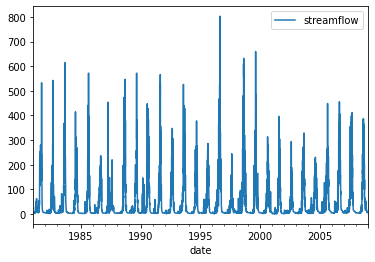

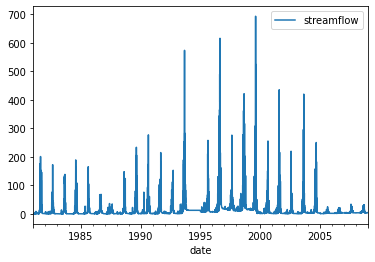

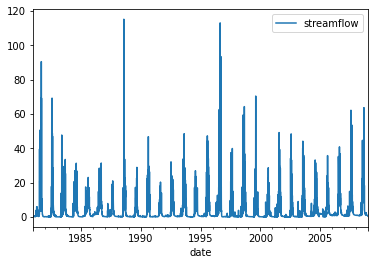

In [ ]:
sf_hom.plot(), sf_akaki.plot(), sf_berga.plot()

#Precipitation plots

(<matplotlib.axes._subplots.AxesSubplot at 0x7f9abf12a050>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f9abf85dcd0>)

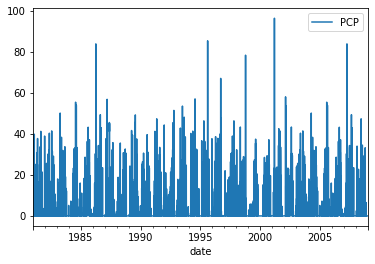

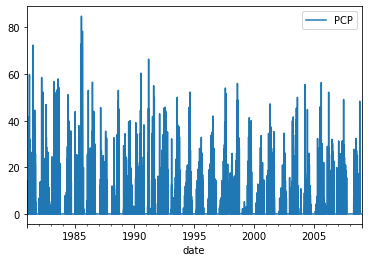

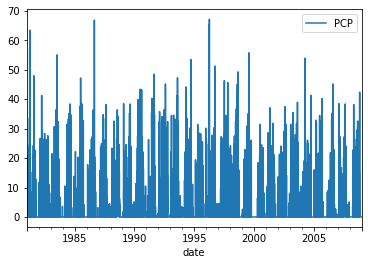

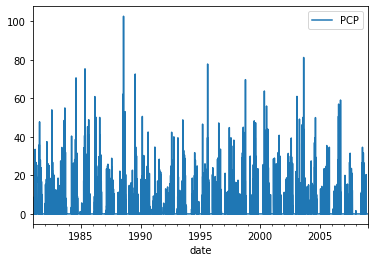

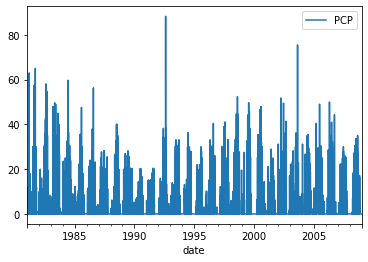

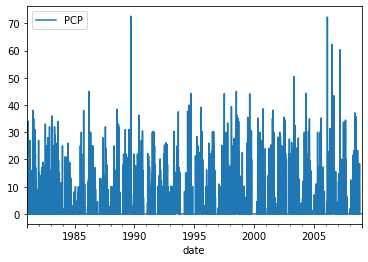

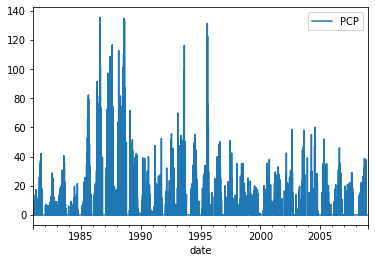

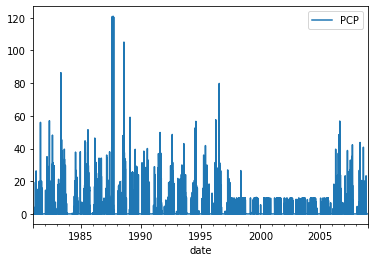

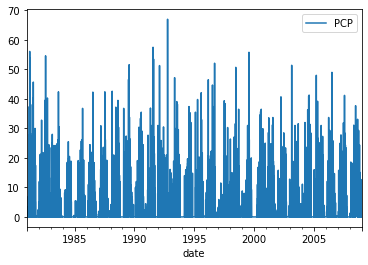

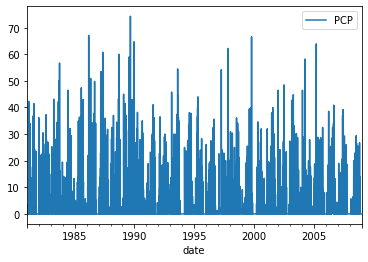

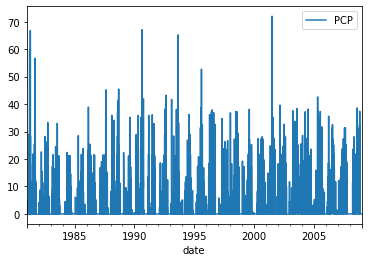

In [ ]:
pcp_aa.plot(), pcp_hom.plot(),pcp_asgori.plot(),pcp_sendefa.plot(),pcp_tulubolo.plot(),pcp_aalem.plot(), pcp_sebeta.plot(),pcp_boneya.plot(),pcp_kimoye.plot(),pcp_ginchi.plot(),pcp_guranda.plot()

#Tempature Plots

(<matplotlib.axes._subplots.AxesSubplot at 0x7f9ac0574d10>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f9abdac8350>)

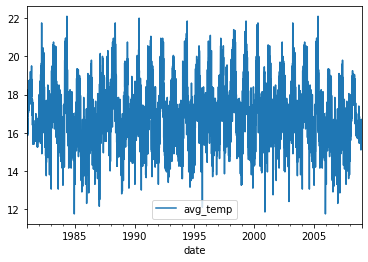

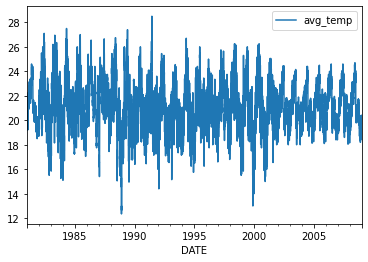

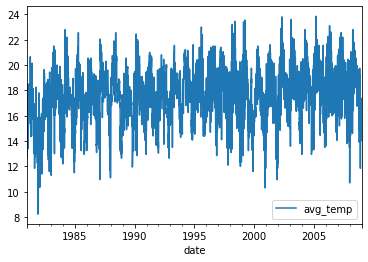

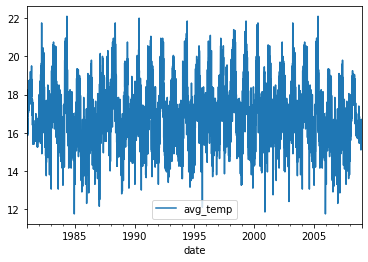

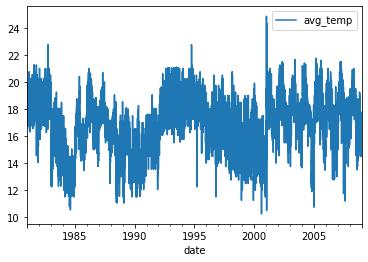

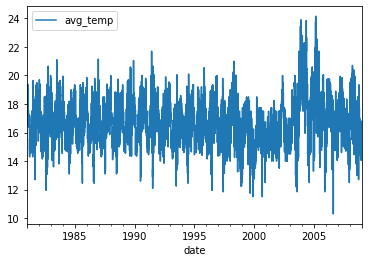

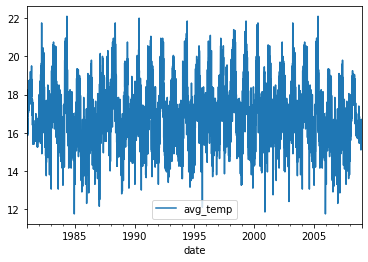

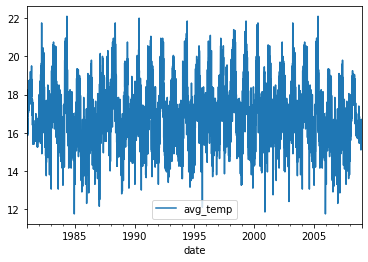

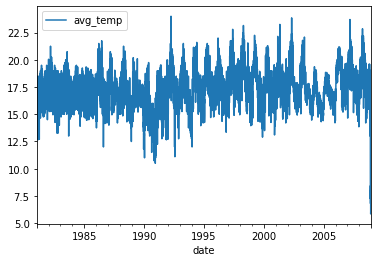

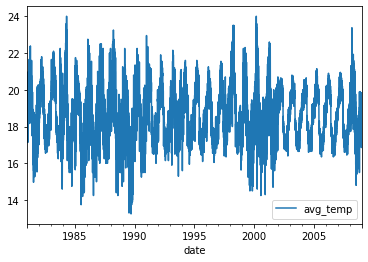

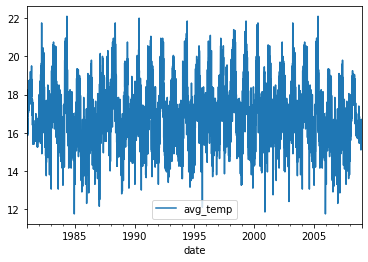

In [ ]:
temp_aa.plot(), temp_hom.plot(),temp_asgori.plot(),temp_sendefa.plot(),temp_tulubolo.plot(),temp_aalem.plot(), temp_sebeta.plot(),temp_boneya.plot(),temp_kimoye.plot(),temp_ginchi.plot(),temp_guranda.plot()

#Humudity Plots

(<matplotlib.axes._subplots.AxesSubplot at 0x7f9ac03e9c90>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f9abc69f390>)

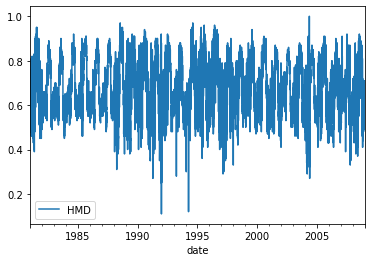

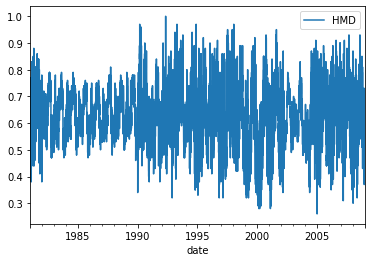

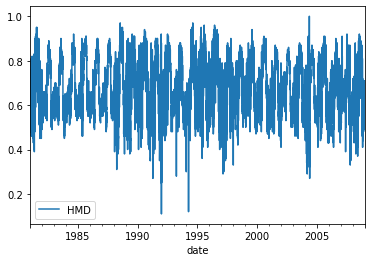

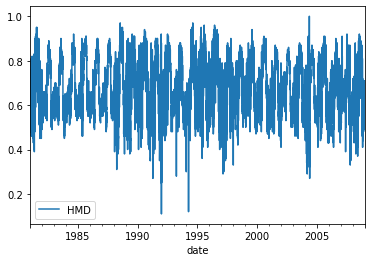

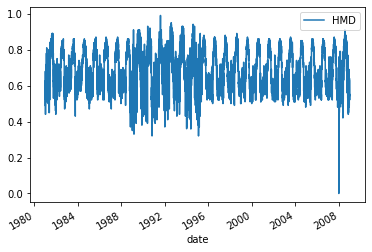

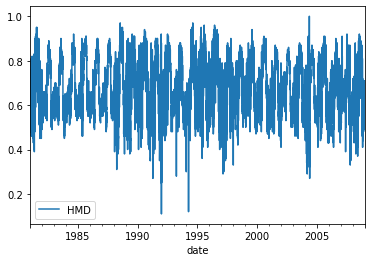

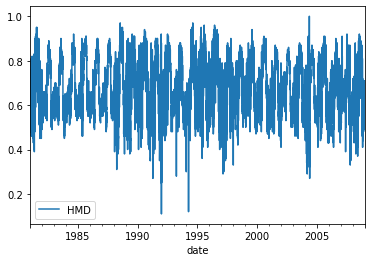

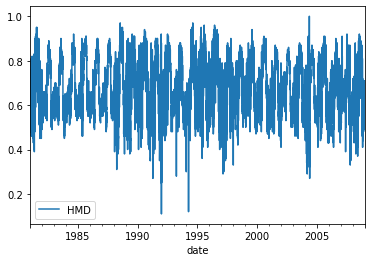

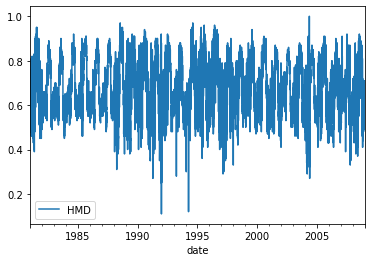

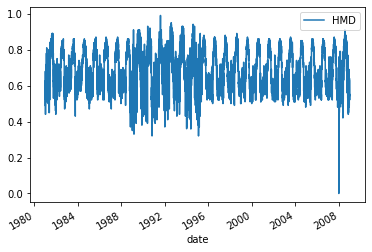

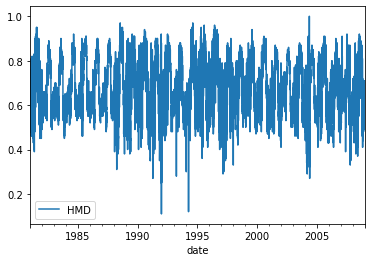

In [ ]:
hmd_aa.plot(), hmd_hom.plot(),hmd_asgori.plot(),hmd_sendefa.plot(),hmd_tulubolo.plot(),hmd_aalem.plot(), hmd_sebeta.plot(),hmd_boneya.plot(),hmd_kimoye.plot(),hmd_ginchi.plot(),hmd_guranda.plot()

#Wind speed plots

(<matplotlib.axes._subplots.AxesSubplot at 0x7f9abd815850>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f9abd130090>)

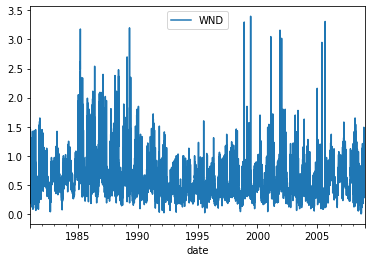

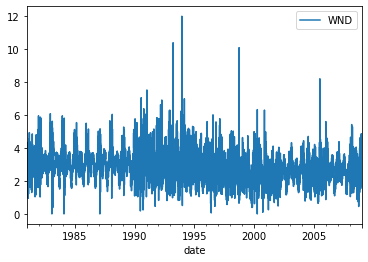

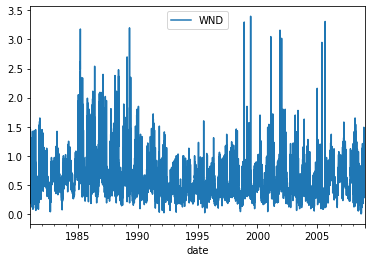

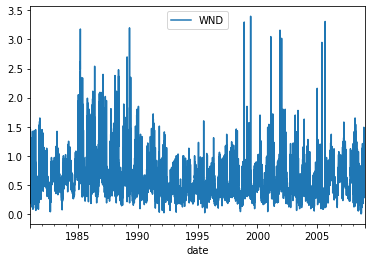

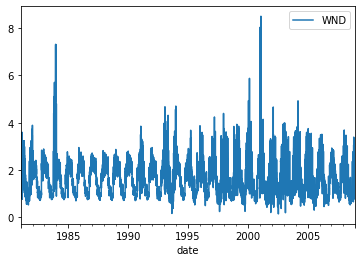

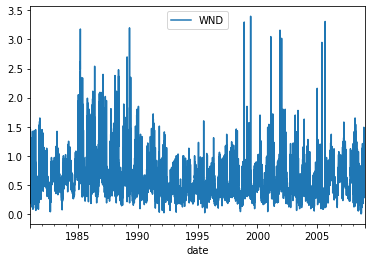

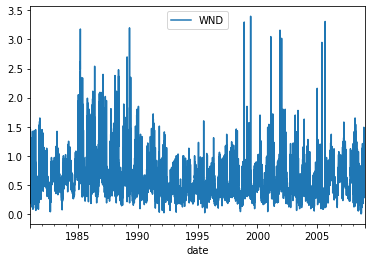

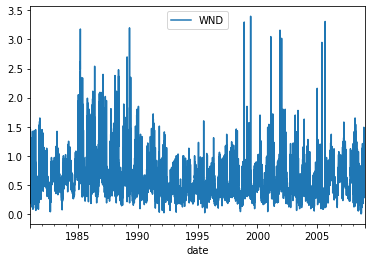

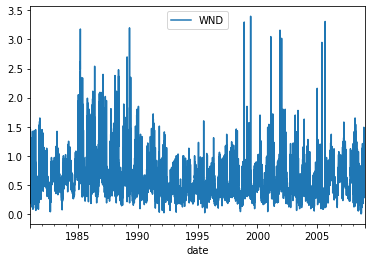

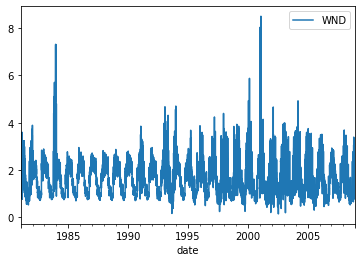

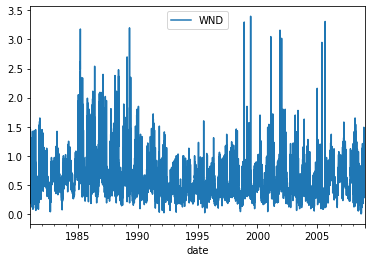

In [ ]:
wnd_aa.plot(),wnd_hom.plot(),wnd_asgori.plot(),wnd_sendefa.plot(),wnd_tulubolo.plot(),wnd_aalem.plot(), wnd_sebeta.plot(),wnd_boneya.plot(),wnd_kimoye.plot(),wnd_ginchi.plot(),wnd_guranda.plot()

#Resampled daily, weekly, monthly and yearly mean value for streamflow at target station

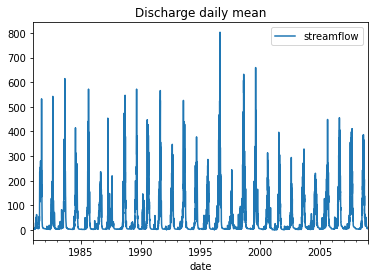

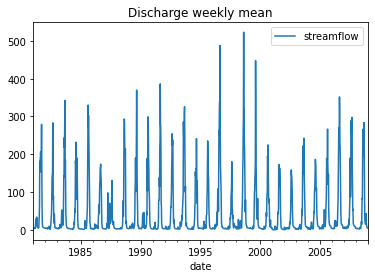

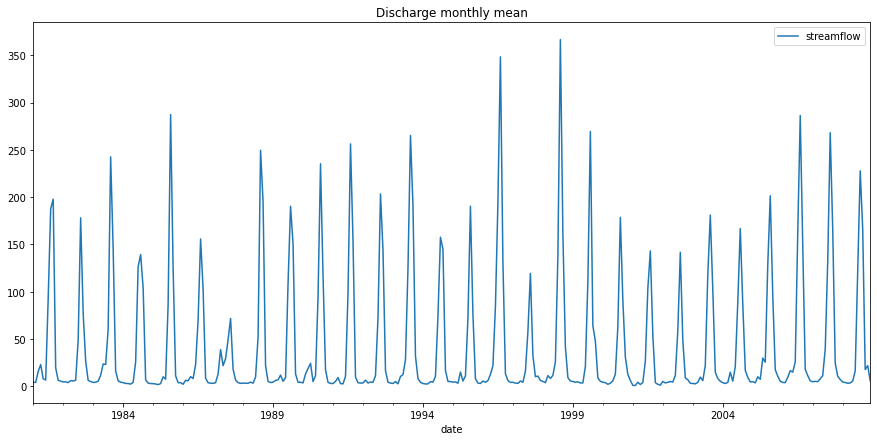

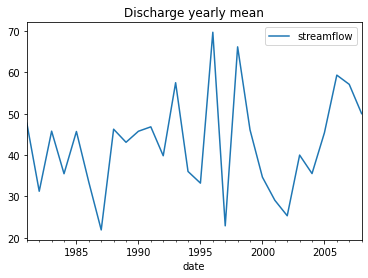

In [ ]:
sf_hom_D = sf_hom.resample('1D').mean()
sf_hom_W = sf_hom.resample('1W').mean()
sf_hom_M = sf_hom.resample('1M').mean()
sf_hom_Y = sf_hom.resample('1Y').mean()


sf_hom_D.plot(title="Discharge daily mean")
sf_hom_W.plot(title="Discharge weekly mean")
sf_hom_M.plot(title="Discharge monthly mean",figsize=(15,7))
sf_hom_Y.plot(title="Discharge yearly mean")

#Autocorrelation for streamflow at 3 different guaging stations

In [ ]:
pd.plotting.autocorrelation_plot(sf_hom['streamflow'])
#ax= pd.plotting.autocorrelation_plot(sf_hom['streamflow'])
#ax.set_xlim([0, 2000])
plt.title("Discharge daily mean")
plt.show()

pd.plotting.autocorrelation_plot(sf_akaki['streamflow'])
plt.title("Discharge weekly mean")
plt.show()

pd.plotting.autocorrelation_plot(sf_berga['streamflow'])
plt.title("Discharge monthly mean")
plt.show()

#from the graphs we can see that there is a corellation between the streamflows and their lags. But after 2000 days the correlation starts to decrease.
# The negative correlation between the time lags is mostly insignificant. This may be due to seasonality of the streamflow---meaning that in one
#season the streamflow may be high and on the next season it will be less 
# The plot also shows seasonality of the data 

In [ ]:
print(len(sf_akaki['streamflow']))
plot_acf(sf_akaki['streamflow'],lags=50)

plot_acf(sf_hom['streamflow'],lags=50)

plot_acf(sf_berga['streamflow'],lags=50)

#Autocorrelation for preciptation at 11 guaging stations 

In [ ]:
#pd.plotting.autocorrelation_plot(pcp_aa['PCP'])
plot_acf(pcp_aa['PCP'],lags=50)
plt.title("Preciptation daily")
plt.show()

#pd.plotting.autocorrelation_plot(pcp_hom['PCP'])
plot_acf(pcp_hom['PCP'],lags=50)
plt.title("Preciptation daily")
plt.show()

#pd.plotting.autocorrelation_plot(pcp_asgori['PCP'])
plot_acf(pcp_asgori['PCP'],lags=50)
plt.title("Preciptation daily")
plt.show()

#pd.plotting.autocorrelation_plot(pcp_sendefa['PCP'])
plot_acf(pcp_sendefa['PCP'],lags=50)
plt.title("Preciptation daily")
plt.show()

#pd.plotting.autocorrelation_plot(pcp_tulubolo['PCP'])
plot_acf(pcp_tulubolo['PCP'],lags=50)
plt.title("Preciptation daily")
plt.show()

#pd.plotting.autocorrelation_plot(pcp_aalem['PCP'])
plot_acf(pcp_aalem['PCP'],lags=50)
plt.title("Preciptation daily")
plt.show()

#pd.plotting.autocorrelation_plot(pcp_boneya['PCP'])
plot_acf(pcp_boneya['PCP'],lags=50)
plt.title("Preciptation daily")
plt.show()

#pd.plotting.autocorrelation_plot(pcp_kimoye['PCP'])
plot_acf(pcp_kimoye['PCP'],lags=50)
plt.title("Preciptation daily")
plt.show()

#pd.plotting.autocorrelation_plot(pcp_sebeta['PCP'])
plot_acf(pcp_sebeta['PCP'],lags=50)
plt.title("Preciptation daily")
plt.show()

#pd.plotting.autocorrelation_plot(pcp_guranda['PCP'])
plot_acf(pcp_guranda['PCP'],lags=50)
plt.title("Preciptation daily")
plt.show()

#pd.plotting.autocorrelation_plot(pcp_ginchi['PCP'])
plot_acf(pcp_ginchi['PCP'],lags=50)
plt.title("Preciptation daily")
plt.show()

#Autocorrelation for temperature at 11 guaging stations

In [ ]:
# pd.plotting.autocorrelation_plot(temp_aa['avg_temp'])
# plt.title("Temperature daily")
# plt.show()

#pd.plotting.autocorrelation_plot(temp_aa['avg_temp'])
plot_acf(temp_aa['avg_temp'],lags=50)
plt.title("temprature daily")
plt.show()

#pd.plotting.autocorrelation_plot(temp_hom['avg_temp'])
plot_acf(temp_hom['avg_temp'],lags=50)
plt.title("temprature daily")
plt.show()

#pd.plotting.autocorrelation_plot(temp_asgori['avg_temp'])
plot_acf(temp_asgori['avg_temp'],lags=50)
plt.title("temprature daily")
plt.show()

#pd.plotting.autocorrelation_plot(temp_sendefa['avg_temp'])
plot_acf(temp_sendefa['avg_temp'],lags=50)
plt.title("temprature daily")
plt.show()

#pd.plotting.autocorrelation_plot(temp_tulubolo['avg_temp'])
plot_acf(temp_tulubolo['avg_temp'],lags=50)
plt.title("temprature daily")
plt.show()

#pd.plotting.autocorrelation_plot(temp_aalem['avg_temp'])
plot_acf(temp_aalem['avg_temp'],lags=50)
plt.title("temprature daily")
plt.show()

#pd.plotting.autocorrelation_plot(temp_boneya['avg_temp'])
plot_acf(temp_boneya['avg_temp'],lags=50)
plt.title("temprature daily")
plt.show()

#pd.plotting.autocorrelation_plot(temp_kimoye['avg_temp'])
plot_acf(temp_kimoye['avg_temp'],lags=50)
plt.title("temprature daily")
plt.show()

#pd.plotting.autocorrelation_plot(temp_sebeta['avg_temp'])
plot_acf(temp_sebeta['avg_temp'],lags=50)
plt.title("temprature daily")
plt.show()

#pd.plotting.autocorrelation_plot(temp_guranda['avg_temp'])
plot_acf(temp_guranda['avg_temp'],lags=50)
plt.title("temprature daily")
plt.show()

#pd.plotting.autocorrelation_plot(temp_ginchi['avg_temp'])
plot_acf(temp_ginchi['avg_temp'],lags=50)
plt.title("temprature daily")
plt.show()


#Autocorrelation for Humudity at 11 guaging stations

In [ ]:
pd.plotting.autocorrelation_plot(hmd_tulubolo['HMD'])
plot_acf(hmd_tulubolo['HMD'],lags=100)
plt.title("humidity daily")
plt.show()

In [ ]:
#pd.plotting.autocorrelation_plot(hmd_ginchi['HMD'])
plot_acf(hmd_ginchi['HMD'],lags=50)
plt.title("humidity daily")
plt.show()

#the jumidity at ginchi station does not have any corelation and it is removed from our dataset since it will not help on prediction task.

In [ ]:
# pd.plotting.autocorrelation_plot(hmd_aa['HMD'])
# plt.title("humudirt daily")
# plt.show()

#pd.plotting.autocorrelation_plot(hmd_aa['HMD'])
plot_acf(hmd_aa['HMD'],lags=50)
plt.title("humidity daily")
plt.show()

#pd.plotting.autocorrelation_plot(hmd_hom['HMD'])
plot_acf(hmd_hom['HMD'],lags=50)
plt.title("humidity daily")
plt.show()

#pd.plotting.autocorrelation_plot(hmd_asgori['HMD'])
plot_acf(hmd_asgori['HMD'],lags=50)
plt.title("humidity daily")
plt.show()

#pd.plotting.autocorrelation_plot(hmd_sendefa['HMD'])
plot_acf(hmd_sendefa['HMD'],lags=50)
plt.title("humidity daily")
plt.show()

#pd.plotting.autocorrelation_plot(hmd_tulubolo['HMD'])
plot_acf(hmd_tulubolo['HMD'],lags=50)
plt.title("humidity daily")
plt.show()

#pd.plotting.autocorrelation_plot(hmd_aalem['HMD'])
plot_acf(hmd_aalem['HMD'],lags=50)
plt.title("humidity daily")
plt.show()

#pd.plotting.autocorrelation_plot(hmd_boneya['HMD'])
plot_acf(hmd_boneya['HMD'],lags=50)
plt.title("humidity daily")
plt.show()

#pd.plotting.autocorrelation_plot(hmd_kimoye['HMD'])
plot_acf(hmd_kimoye['HMD'],lags=50)
plt.title("humidity daily")
plt.show()

#pd.plotting.autocorrelation_plot(hmd_sebeta['HMD'])
plot_acf(hmd_sebeta['HMD'],lags=50)
plt.title("humidity daily")
plt.show()

#pd.plotting.autocorrelation_plot(hmd_guranda['HMD'])
plot_acf(hmd_guranda['HMD'],lags=50)
plt.title("humidity daily")
plt.show()

#pd.plotting.autocorrelation_plot(hmd_ginchi['HMD'])
plot_acf(hmd_ginchi['HMD'],lags=50)
plt.title("humidity daily")
plt.show()


#Autocorrelation for wind at 11 guaging stations

In [ ]:
# pd.plotting.autocorrelation_plot(wnd_aa['WND'])
# plt.title("wind daily")
# plt.show()

#pd.plotting.autocorrelation_plot(wnd_aa['WND'])
plot_acf(wnd_aa['WND'],lags=50)
plt.title("wind daily")
plt.show()

#pd.plotting.autocorrelation_plot(wnd_hom['WND'])
plot_acf(wnd_hom['WND'],lags=50)
plt.title("wind daily")
plt.show()

#pd.plotting.autocorrelation_plot(wnd_asgori['WND'])
plot_acf(wnd_asgori['WND'],lags=50)
plt.title("wind daily")
plt.show()

#pd.plotting.autocorrelation_plot(wnd_sendefa['WND'])
plot_acf(wnd_sendefa['WND'],lags=50)
plt.title("wind daily")
plt.show()

#pd.plotting.autocorrelation_plot(wnd_tulubolo['WND'])
plot_acf(wnd_tulubolo['WND'],lags=50)
plt.title("wind daily")
plt.show()

#pd.plotting.autocorrelation_plot(wnd_aalem['WND'])
plot_acf(wnd_aalem['WND'],lags=50)
plt.title("wind daily")
plt.show()

#pd.plotting.autocorrelation_plot(wnd_boneya['WND'])
plot_acf(wnd_boneya['WND'],lags=50)
plt.title("wind daily")
plt.show()

#pd.plotting.autocorrelation_plot(wnd_kimoye['WND'])
plot_acf(wnd_kimoye['WND'],lags=50)
plt.title("wind daily")
plt.show()

#pd.plotting.autocorrelation_plot(wnd_sebeta['WND'])
plot_acf(wnd_sebeta['WND'],lags=50)
plt.title("wind daily")
plt.show()

#pd.plotting.autocorrelation_plot(wnd_guranda['WND'])
plot_acf(wnd_guranda['WND'],lags=50)
plt.title("wind daily")
plt.show()

#pd.plotting.autocorrelation_plot(wnd_ginchi['WND'])
plot_acf(wnd_ginchi['WND'],lags=50)
plt.title("wind daily")
plt.show()


#Data Preparation for multivariate input(i.e preciptation,temp,hum,wind @ 11 guaging stations and lagged discharge @ 3 guaging stations) and multiple step output (streamflow at target guaging station for future n days) Encoder-Decoder MODEL

#Supervised data generating function

In [12]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	"""
	Frame a time series as a supervised learning dataset.
	Arguments:
		data: Sequence of observations as a list or NumPy array.
		n_in: Number of lag observations as input (X).
		n_out: Number of observations as output (y).
		dropnan: Boolean whether or not to drop rows with NaN values.
	Returns:
		Pandas DataFrame of series framed for supervised learning.
	"""
	n_vars = 1 if type(data) is list else data.shape[1]
	df = DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

In [13]:
# n stations [prcn, prcn-1,...prc1]

#variable declaration

In [14]:
look_back = 10 #Number of time-steps/ time-lags (in days) to see in the past before predicting the current/future 
n_features = 47 #Temp (11 station), rain (@ 11 station), humudity (@ 11 stations), wind speed (@ 11 stations)
                # and lagged discharge (@ 2 other stations and the target station which is hombole)

In [15]:
n_hours = look_back

#1. Training data preparation on year based slicing of pandas dataframe into trainig, validation and test, 20 years data used for training , 4 years data for validation and 4 years data for testing

#Dataframe holding multivariate training data

In [16]:
raw = DataFrame()
#Temperature features 
raw['temp_aa'] = temp_aa['avg_temp']
raw['temp_hom'] = temp_hom['avg_temp']
raw['temp_asgori'] = temp_asgori['avg_temp']
raw['temp_sendefa'] = temp_sendefa['avg_temp']
raw['temp_tulubolo'] = temp_tulubolo['avg_temp']
raw['temp_aalem'] = temp_aalem['avg_temp']
raw['temp_boneya'] = temp_boneya['avg_temp']
raw['temp_kimoye'] = temp_kimoye['avg_temp']
raw['temp_sebeta'] = temp_sebeta['avg_temp']
raw['temp_guranda'] = temp_guranda['avg_temp']
raw['temp_ginchi'] = temp_ginchi['avg_temp']
# #preciptation features
raw['rain_aa'] = pcp_aa['PCP']
raw['rain_hom'] = pcp_hom['PCP']
raw['rain_asgori'] = pcp_asgori['PCP']
raw['rain_sendefa'] = pcp_sendefa['PCP']
raw['rain_tulubolo'] = pcp_tulubolo['PCP']
raw['rain_aalem'] = pcp_aalem['PCP']
raw['rain_boneya'] = pcp_boneya['PCP']
raw['rain_kimoye'] = pcp_kimoye['PCP']
raw['rain_sebeta'] = pcp_sebeta['PCP']
raw['rain_guranda'] = pcp_guranda['PCP']
raw['rain_ginchi'] = pcp_ginchi['PCP']
# #Humudity features 
raw['hmd_aa'] = hmd_aa['HMD']
raw['hmd_hom'] = hmd_hom['HMD']
raw['hmd_asgori'] = hmd_asgori['HMD']
raw['hmd_sendefa'] = hmd_sendefa['HMD']
raw['hmd_tulubolo'] = hmd_tulubolo['HMD']
raw['hmd_aalem'] = hmd_aalem['HMD']
raw['hmd_boneya'] = hmd_boneya['HMD']
raw['hmd_kimoye'] = hmd_kimoye['HMD']
raw['hmd_sebeta'] = hmd_sebeta['HMD']
raw['hmd_guranda'] = hmd_guranda['HMD']
raw['hmd_ginchi'] = hmd_ginchi['HMD']

# #Wind features 
raw['wnd_aa'] = wnd_aa['WND']
raw['wnd_hom'] = wnd_hom['WND']
raw['wnd_asgori'] = wnd_asgori['WND']
raw['wnd_sendefa'] = wnd_sendefa['WND']
raw['wnd_tulubolo'] = wnd_tulubolo['WND']
raw['wnd_aalem'] = wnd_aalem['WND']
raw['wnd_boneya'] = wnd_boneya['WND']
raw['wnd_kimoye'] = wnd_kimoye['WND']
raw['wnd_sebeta'] = wnd_sebeta['WND']
raw['wnd_guranda'] = wnd_guranda['WND']
raw['wnd_ginchi'] = wnd_ginchi['WND']

#Streamflow features
raw['Q_akaki'] = sf_akaki['streamflow']
raw['Q_berga'] = sf_berga['streamflow']
raw['Q_hom'] = sf_hom['streamflow']
  

#Training data partition (1981 - 2000)

In [17]:
raw_train= raw.loc['1981-01-01':'2000-12-31']
values_train = raw_train.values


#Validation data partition (2001 - 2004)

In [18]:
raw_val = raw.loc['2001-01-01':'2004-12-31']
values_val = raw_val.values


#Test data partition (2004 - 2008)

In [19]:
raw_test = raw.loc['2005-01-01':'2008-12-31']
values_test = raw_test.values


#Generating Supervised data for train, valid and test

In [20]:
sup_train = series_to_supervised(values_train, n_hours, 3) 

print(sup_train.shape)

(7293, 611)


In [21]:
sup_val = series_to_supervised(values_val, n_hours, 3) 

print(sup_val.shape)

(1449, 611)


In [22]:
sup_test = series_to_supervised(values_test, n_hours, 3) 

print(sup_test.shape)

(1449, 611)


#Use the following 2 drop column approaches (or you can apply the second option alone) to re-format your training dataset. I manually calculated the columuns to delete based on the data size I have.

#a) Drop columuns at the beginning of the dataframe (i.e the first supervised data sample) to make the data in the form of previous (t-n-1, ....t) for the pcp, temp,hmd,wnd,and two other stream flows and (t-n, t-n-1, ....t-1) for the lagged target station streamflow data.

In [ ]:
sup_train.drop(sup_train.iloc[:,0:46], axis=1, inplace=True)
sup_train

In [ ]:
sup_val.drop(sup_val.iloc[:,0:46], axis=1, inplace=True)
sup_val

In [ ]:
sup_test.drop(sup_test.iloc[:,0:46], axis=1, inplace=True)
sup_test

#b) Drop the columuns for pcp, temp,hmd,wnd at all stations and two other stream flow data stations at the end of the dataframe (for the number of time steps you have as a decoder output). In this case the model input features will be all features including the target streamflow at time steps (t-n, t-n-1, .....t-1) only. If you apply both a) and b) the data will be in the form of a).

In [ ]:
sup_train.drop(sup_train.iloc[:,518:564], axis=1, inplace=True)
sup_train.drop(sup_train.iloc[:,471:517], axis=1, inplace=True)
sup_train

In [ ]:
sup_val.drop(sup_val.iloc[:,518:564], axis=1, inplace=True)
sup_val.drop(sup_val.iloc[:,471:517], axis=1, inplace=True)
sup_val

In [ ]:
sup_test.drop(sup_test.iloc[:,518:564], axis=1, inplace=True)
sup_test.drop(sup_test.iloc[:,471:517], axis=1, inplace=True)
sup_train

#Train, validation and Test split

In [29]:
train = sup_train.values
val = sup_val.values
test = sup_test.values

In [30]:
n_obs = n_hours * n_features
train_X, train_y = train[:, :n_obs], train[:, [470,471,472]]
test_X, test_y = test[:, :n_obs], test[:, [470,471,472]]
val_X, val_y = val[:, :n_obs], val[:, [470,471,472]]
print(train_X.shape, len(train_X), train_y.shape)
print(test_X.shape, len(test_X), test_y.shape)
print(val_X.shape, len(val_X), val_y.shape)

(7293, 470) 7293 (7293, 3)
(1449, 470) 1449 (1449, 3)
(1449, 470) 1449 (1449, 3)


#2. Training data prepartion by randomly classifying the whole data into train, validation and test

#Dataframe holding multivariate training data

In [ ]:
raw = DataFrame()
#Temperature features 
raw['temp_aa'] = temp_aa['avg_temp']
raw['temp_hom'] = temp_hom['avg_temp']
raw['temp_asgori'] = temp_asgori['avg_temp']
raw['temp_sendefa'] = temp_sendefa['avg_temp']
raw['temp_tulubolo'] = temp_tulubolo['avg_temp']
raw['temp_aalem'] = temp_aalem['avg_temp']
raw['temp_boneya'] = temp_boneya['avg_temp']
raw['temp_kimoye'] = temp_kimoye['avg_temp']
raw['temp_sebeta'] = temp_sebeta['avg_temp']
raw['temp_guranda'] = temp_guranda['avg_temp']
raw['temp_ginchi'] = temp_ginchi['avg_temp']
# #preciptation features
raw['rain_aa'] = pcp_aa['PCP']
raw['rain_hom'] = pcp_hom['PCP']
raw['rain_asgori'] = pcp_asgori['PCP']
raw['rain_sendefa'] = pcp_sendefa['PCP']
raw['rain_tulubolo'] = pcp_tulubolo['PCP']
raw['rain_aalem'] = pcp_aalem['PCP']
raw['rain_boneya'] = pcp_boneya['PCP']
raw['rain_kimoye'] = pcp_kimoye['PCP']
raw['rain_sebeta'] = pcp_sebeta['PCP']
raw['rain_guranda'] = pcp_guranda['PCP']
raw['rain_ginchi'] = pcp_ginchi['PCP']
# #Humudity features 
raw['hmd_aa'] = hmd_aa['HMD']
raw['hmd_hom'] = hmd_hom['HMD']
raw['hmd_asgori'] = hmd_asgori['HMD']
raw['hmd_sendefa'] = hmd_sendefa['HMD']
raw['hmd_tulubolo'] = hmd_tulubolo['HMD']
raw['hmd_aalem'] = hmd_aalem['HMD']
raw['hmd_boneya'] = hmd_boneya['HMD']
raw['hmd_kimoye'] = hmd_kimoye['HMD']
raw['hmd_sebeta'] = hmd_sebeta['HMD']
raw['hmd_guranda'] = hmd_guranda['HMD']
raw['hmd_ginchi'] = hmd_ginchi['HMD']

# #Wind features 
raw['wnd_aa'] = wnd_aa['WND']
raw['wnd_hom'] = wnd_hom['WND']
raw['wnd_asgori'] = wnd_asgori['WND']
raw['wnd_sendefa'] = wnd_sendefa['WND']
raw['wnd_tulubolo'] = wnd_tulubolo['WND']
raw['wnd_aalem'] = wnd_aalem['WND']
raw['wnd_boneya'] = wnd_boneya['WND']
raw['wnd_kimoye'] = wnd_kimoye['WND']
raw['wnd_sebeta'] = wnd_sebeta['WND']
raw['wnd_guranda'] = wnd_guranda['WND']
raw['wnd_ginchi'] = wnd_ginchi['WND']

#Streamflow features
raw['Q_akaki'] = sf_akaki['streamflow']
raw['Q_berga'] = sf_berga['streamflow']
raw['Q_hom'] = sf_hom['streamflow']


values_2 = raw.values

#Generating Supervised data

In [ ]:
reframed = series_to_supervised(values_2, n_hours, 3) 

print(reframed.shape)

(10215, 611)


In [ ]:
reframed

#Use either b only or both drop column approaches for re-formatting your training data

#a) Drop columuns at the beginning of the dataframe (i.e the first supervised data sample) to make the data in the form of previous (t-n-1, ....t) for the pcp, temp,hmd,wnd,and two other stream flows and (t-n, t-n-1, ....t-1) for the lagged target station streamflow data.

In [ ]:
# the columun values shoudl have to be changed manualy based on the data frame size and shape
reframed.drop(reframed.iloc[:,0:46], axis=1, inplace=True)
reframed

#b) Drop the columuns for pcp, temp,hmd,wnd at all stations and two other stream flow data stations at the end of the dataframe (for the number of time steps you have as a decoder output). In this case the model input features will be all features including the target streamflow at time steps (t-n, t-n-1, .....t-1) only. or you can apply both column drop options as well.

In [ ]:
reframed.drop(reframed.iloc[:,518:564], axis=1, inplace=True)
reframed.drop(reframed.iloc[:,471:517], axis=1, inplace=True)
reframed

In [ ]:
reframed.shape

(10215, 473)

#Train, Validation and Test split

In [ ]:
values_2 = reframed.values
TRAIN_SIZE = 0.8
n_train = int(len(values_2) * TRAIN_SIZE) 
train = values_2[:n_train, :]
eval = values_2[n_train:, :]

In [ ]:
TEST_SIZE = 0.5
n_val= int(len(eval) * TEST_SIZE) 
val = eval[:n_val, :]
test = eval[n_val:, :]

In [ ]:
n_obs = n_hours * n_features
train_X, train_y = train[:, :n_obs], train[:, [470,471,472]]
test_X, test_y = test[:, :n_obs], test[:, [470,471,472]]
val_X, val_y = val[:, :n_obs], val[:, [470,471,472]]
print(train_X.shape, len(train_X), train_y.shape)
print(test_X.shape, len(test_X), test_y.shape)
print(val_X.shape, len(val_X), val_y.shape)

(8172, 470) 8172 (8172, 3)
(1022, 470) 1022 (1022, 3)
(1021, 470) 1021 (1021, 3)


#Feature scaling (the next part of code will work for both approaches described above as 1) and 2) )

In [31]:
# feature scaling
scaler_X = MinMaxScaler(feature_range=(0, 1))
X_train = scaler_X.fit_transform(train_X)

scaler_Y = MinMaxScaler(feature_range=(0, 1))
Y_train = scaler_Y.fit_transform(train_y)

In [32]:
X_test = scaler_X.transform(test_X)
Y_test = scaler_Y.transform(test_y)

X_val = scaler_X.transform(val_X)
Y_val = scaler_Y.transform(val_y)

#Reshaping train, validation and test data into 3D shape since LSTM takes as input a data in the format (samples, time-step, sample_features)




In [33]:
train_X2 = X_train.reshape((X_train.shape[0], n_hours, n_features))
test_X2 = X_test.reshape((X_test.shape[0], n_hours, n_features))
val_X2 = X_val.reshape((X_val.shape[0], n_hours, n_features))
print(train_X2.shape, train_y.shape, test_X2.shape, test_y.shape,val_X2.shape, val_y.shape)

(7293, 10, 47) (7293, 3) (1449, 10, 47) (1449, 3) (1449, 10, 47) (1449, 3)


#Here the target value shape is also changed in to 3D shape to make it suitable for Encoder-Decoder model design.

In [34]:
train_y2 = Y_train.reshape((Y_train.shape[0], 3, 1))
test_y2 = Y_test.reshape((Y_test.shape[0], 3, 1))
val_y2 = Y_val.reshape((Y_val.shape[0], 3, 1))
print(train_X2.shape, train_y2.shape, test_X2.shape, test_y2.shape,val_X2.shape, val_y2.shape)

(7293, 10, 47) (7293, 3, 1) (1449, 10, 47) (1449, 3, 1) (1449, 10, 47) (1449, 3, 1)


#Training data preparation for teacher forcing encoder-decoder training. In this approach the ground truth y_label is shifted by 1. In the shifted location we used a START TOKEN. In machine translation problems the most commonly used start tokens are SOS and EOS tags but since we are working on time series data we should have to use numeric values. But the value used as start token should not be part of the training data. Therefore I selcted other numeric values as start token for this case.

In [35]:
train_decoder_input_data= Y_train.tolist()
for row in train_decoder_input_data:
    row.insert(0,0)
for row in train_decoder_input_data:
    row.pop()
train_decoder_input_data = np.array(train_decoder_input_data ,dtype=np.float32)

In [36]:
val_decoder_input_data = Y_val.tolist()
for row in val_decoder_input_data:
    row.insert(0,0)
for row in val_decoder_input_data:
    row.pop()
val_decoder_input_data = np.array(val_decoder_input_data,dtype=np.float32)

In [37]:
test_decoder_input_data = Y_test.tolist()
for row in test_decoder_input_data:
    row.insert(0,0)
for row in test_decoder_input_data:
    row.pop()
test_decoder_input_data = np.array(test_decoder_input_data,dtype=np.float32)

In [38]:
train_decoder_input_data = train_decoder_input_data.reshape((Y_train.shape[0], 3, 1))
val_decoder_input_data = val_decoder_input_data.reshape((Y_val.shape[0], 3, 1))
test_decoder_input_data = test_decoder_input_data.reshape((Y_test.shape[0], 3, 1))
print(test_decoder_input_data.shape,train_decoder_input_data.shape,val_decoder_input_data.shape)

(1449, 3, 1) (7293, 3, 1) (1449, 3, 1)


#In previous section I have used zero as START TOKEN of the decoder input. But zero is part of the training dataset and that is not a correct way to select a START TOKEN. Thus in this part I have used -1 as START TOKEN and see the differnce in prediction accuracy of the teacher forcing based Encoder-Decoder Approach.

In [76]:
train_decoder_input_data= Y_train.tolist()
for row in train_decoder_input_data:
    row.insert(0,-1)
for row in train_decoder_input_data:
    row.pop()
train_decoder_input_data = np.array(train_decoder_input_data)

In [77]:
val_decoder_input_data = Y_val.tolist()
for row in val_decoder_input_data:
    row.insert(0,-1)
for row in val_decoder_input_data:
    row.pop()
val_decoder_input_data = np.array(val_decoder_input_data)

In [78]:
test_decoder_input_data = Y_test.tolist()
for row in test_decoder_input_data:
    row.insert(0,-1)
for row in test_decoder_input_data:
    row.pop()
test_decoder_input_data = np.array(test_decoder_input_data)

In [79]:
train_decoder_input_data = train_decoder_input_data.reshape((Y_train.shape[0], 3, 1))
val_decoder_input_data = val_decoder_input_data.reshape((Y_val.shape[0], 3, 1))
test_decoder_input_data = test_decoder_input_data.reshape((Y_test.shape[0], 3, 1))
print(test_decoder_input_data.shape,train_decoder_input_data.shape,val_decoder_input_data.shape)

(1449, 3, 1) (7293, 3, 1) (1449, 3, 1)


# 1. Teacher forcing based Encoder-Decoder approach model setup.

In [35]:
keras.backend.clear_session()

layers = [100, 100] # Number of hidden neuros in each layer of the encoder and decoder

learning_rate = 0.001
decay = 0 # Learning rate decay
optimiser = tf.keras.optimizers.Adam(lr=learning_rate, decay=decay) # Other possible optimiser "sgd" (Stochastic Gradient Descent)

num_input_features = 47 # The dimensionality of the input at each time step. In this case a 1D signal.
num_output_features = 1 # The dimensionality of the output at each time step. In this case a 1D signal.

loss = "mse" # Other loss functions are possible, see Keras documentation.

# Regularisation isn't really needed for this application
lambda_regulariser = 0.000001 # Will not be used if regulariser is None
regulariser = None # Possible regulariser: keras.regularizers.l2(lambda_regulariser)

batch_size = 512
steps_per_epoch = 200 # batch_size * steps_per_epoch = total number of training examples
epochs = 15

input_sequence_length = 10 # Length of the sequence used by the encoder
target_sequence_length = 3 # Length of the sequence predicted by the decoder
num_steps_to_predict = 20 # Length to use when testing the model

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


#In the folowwing cells single layer LSTM and GRU are used both at the Encoder and Decoder.

In [80]:
LSTMoutputDimension = 100

In [89]:
encoder_inputs= Input(shape=(input_sequence_length, num_input_features))
encoder_lstm=LSTM(LSTMoutputDimension, return_state=True)
#encoder_lstm=GRU(LSTMoutputDimension, return_state=True)
LSTM_outputs, state_h, state_c = encoder_lstm(encoder_inputs)
#GRU_outputs, state_h = encoder_lstm(encoder_inputs)

encoder_states = [state_h,state_c]
#encoder_states = [state_h]

decoder_inputs = Input(shape=(None, num_output_features), name='decoder_inputs')
decoder_lstm = LSTM(LSTMoutputDimension, return_sequences=True, return_state=True, name='decoder_lstm')
#decoder_lstm = GRU(LSTMoutputDimension, return_sequences=True, return_state=True, name='decoder_lstm')

decoder_outputs, _,_ = decoder_lstm(decoder_inputs, initial_state=encoder_states) # For the case of LSTM based architecture we have 3 outputs
#decoder_outputs, _ = decoder_lstm(decoder_inputs, initial_state=encoder_states) # For the case of GRU based architecture we have 2 outputs

# dropout = Dropout(rate=0.25)
# decoder_outputs = dropout(decoder_outputs)

decoder_dense = Dense(num_output_features, activation='linear', name='decoder_dense')
decoder_outputs = decoder_dense(decoder_outputs)



model = Model([encoder_inputs, decoder_inputs], decoder_outputs, name='model_encoder_training')

#In the following cells Stacked (2 layer) LSTM/GRU architectures are used both at the Encoder and Decoder. Here the input is using the teacher forcing approach as explained above.

In [74]:
# The Encoder
encoder_inputs = keras.layers.Input(shape=(None, num_input_features))

encoder_cells = []
for hidden_neurons in layers:
    # encoder_cells.append(keras.layers.GRUCell(hidden_neurons,
    #                                           kernel_regularizer=regulariser,
    #                                           recurrent_regularizer=regulariser,
    #                                           bias_regularizer=regulariser))
    # Stacked LSTM
    encoder_cells.append(keras.layers.LSTMCell(hidden_neurons,
                                              kernel_regularizer=regulariser,
                                              recurrent_regularizer=regulariser,
                                              bias_regularizer=regulariser))
    

encoder = keras.layers.RNN(encoder_cells, return_state=True)

encoder_outputs_and_states = encoder(encoder_inputs)

encoder_states = encoder_outputs_and_states[1:]

In [75]:
# The decoder 
decoder_inputs = keras.layers.Input(shape=(None, 1))

decoder_cells = []
for hidden_neurons in layers:
    # decoder_cells.append(keras.layers.GRUCell(hidden_neurons,
    #                                           kernel_regularizer=regulariser,
    #                                           recurrent_regularizer=regulariser,
    #                                           bias_regularizer=regulariser))
    #Stacked LSTM
    decoder_cells.append(keras.layers.LSTMCell(hidden_neurons,
                                              kernel_regularizer=regulariser,
                                              recurrent_regularizer=regulariser,
                                              bias_regularizer=regulariser))

decoder = keras.layers.RNN(decoder_cells, return_sequences=True, return_state=True)

decoder_outputs_and_states = decoder(decoder_inputs, initial_state=encoder_states)

decoder_outputs = decoder_outputs_and_states[0]

# dropout = Dropout(rate=0.25)
# decoder_outputs = dropout(decoder_outputs)

decoder_dense = keras.layers.Dense(num_output_features,
                                   activation='linear',
                                   kernel_regularizer=regulariser,
                                   bias_regularizer=regulariser)

decoder_outputs = decoder_dense(decoder_outputs)

In [76]:
model = keras.models.Model(inputs=[encoder_inputs, decoder_inputs], outputs=decoder_outputs)

#In the following cells single and 2 layer layer Bi-LSTM/GRU architectures are used both at the Encoder and Decoder. Here also the input is using the teacher forcing approach as explained above. ( It does not work well for the task. May be due to the teacher forcing approach is not suitable for forward backward computation of gradients)

In [39]:
# The encoder
encoder_inputs = Input(shape=(input_sequence_length, num_input_features), name='encoder_inputs')

encoder_lstm1 = Bidirectional(LSTM(100,return_state=True,return_sequences=True))
#encoder_lstm1 = Bidirectional(GRU(50,return_state=True,return_sequences=True))
encoder_lstm1_output,forward_h1,forward_c1,backward_h1,backward_c1 = encoder_lstm1(encoder_inputs) # For LSTM based
#encoder_lstm1_output,forward_h1,backward_h1= encoder_lstm1(encoder_inputs) # For GRU based

encoder_lstm2 = Bidirectional(LSTM(100,return_state=True,return_sequences=True))
#encoder_lstm2 = Bidirectional(GRU(50,return_state=True))
encoder_lstm2_output,forward_h2,forward_c2,backward_h2,backward_c2 = encoder_lstm2(encoder_lstm1_output)
#encoder_lstm2_output,forward_h2,backward_h2= encoder_lstm2(encoder_lstm1_output)

# state_h = Concatenate()([forward_h2,backward_h2])
# state_c = Concatenate()([forward_c2,backward_c2])
#encoder_states = [state_h, state_c]

states = [forward_h2,forward_c2,backward_h2,backward_c2]
#states = [forward_h2,backward_h2]



#The Decoder part 
decoder_inputs = keras.layers.Input(shape=(None, 1))


decoder_lstm1 = Bidirectional(LSTM(100,return_state=True,return_sequences=True))
#decoder_lstm1 = Bidirectional(GRU(50,return_state=True,return_sequences=True))
decoder_lstm1_output,forward_h1,forward_c1,backward_h1,backward_c1 = decoder_lstm1(decoder_inputs,initial_state=states)
#decoder_lstm1_output,forward_h1,backward_h1 = decoder_lstm1(decoder_inputs,initial_state=states)

#decoder_lstm2 = Bidirectional(LSTM(100,return_state=True,return_sequences=True))
#decoder_lstm2 = Bidirectional(GRU(50,return_state=True))
#decoder_lstm2_output,forward_h2,forward_c2,backward_h2,backward_c2 = decoder_lstm2(decoder_lstm1_output)
#decoder_lstm2_output,forward_h2,backward_h2 = decoder_lstm2(decoder_lstm1_output)

decoder_outputs = decoder_lstm1_output

dropout = Dropout(rate=0.25)
decoder_outputs = dropout(decoder_outputs)

decoder_dense = keras.layers.Dense(num_output_features,
                                  activation='linear',
                                  kernel_regularizer=regulariser,
                                  bias_regularizer=regulariser)


decoder_outputs = decoder_dense(decoder_outputs)

model = keras.models.Model(inputs=[encoder_inputs, decoder_inputs], outputs=decoder_outputs)


#Training the model

In [40]:
model.compile(optimizer=optimiser, loss=loss)
#model.summary()

In [41]:
history2 = model.fit([train_X2,train_decoder_input_data], train_y2, epochs=50, batch_size=100, validation_data=([val_X2,val_decoder_input_data], val_y2), verbose=1, shuffle=False)

Epoch 1/50
73/73 [==============================] - 17s 56ms/step - loss: 0.0123 - val_loss: 0.0017
Epoch 2/50
73/73 [==============================] - 1s 15ms/step - loss: 0.0026 - val_loss: 8.7763e-04
Epoch 3/50
73/73 [==============================] - 1s 14ms/step - loss: 0.0018 - val_loss: 7.7342e-04
Epoch 4/50
73/73 [==============================] - 1s 16ms/step - loss: 0.0016 - val_loss: 7.4212e-04
Epoch 5/50
73/73 [==============================] - 1s 16ms/step - loss: 0.0014 - val_loss: 6.3979e-04
Epoch 6/50
73/73 [==============================] - 1s 15ms/step - loss: 0.0013 - val_loss: 5.7320e-04
Epoch 7/50
73/73 [==============================] - 1s 17ms/step - loss: 0.0012 - val_loss: 5.5518e-04
Epoch 8/50
73/73 [==============================] - 1s 15ms/step - loss: 0.0011 - val_loss: 5.1916e-04
Epoch 9/50
73/73 [==============================] - 1s 16ms/step - loss: 0.0011 - val_loss: 4.7438e-04
Epoch 10/50
73/73 [==============================] - 1s 15ms/step - loss: 0.

#Plot the loss curve

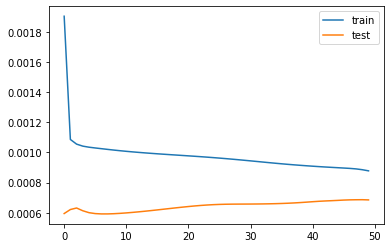

In [ ]:
plt.plot(history2.history['loss'], label='train')
plt.plot(history2.history['val_loss'], label='test')
plt.legend()
plt.show()

#Prediction result on test dataset

In [42]:
y_test_predicted = model.predict([test_X2,test_decoder_input_data])
pred= tf.reshape(y_test_predicted, [1449, 3])
orig=tf.reshape(test_y2, [1449, 3])
inv_yhat2 = scaler_Y.inverse_transform(pred)
inv_y2 = scaler_Y.inverse_transform(orig)

# A function used to calculate the mean squared error value of a given model for the multi-step prediction encoder-decoder approach.

In [36]:
# the code is taken from https://machinelearningmastery.com/how-to-develop-lstm-models-for-multi-step-time-series-forecasting-of-household-power-consumption/
def evaluate_forecasts_mse(actual, predicted):
	scores = list()
	# calculate an RMSE score for each day
	for i in range(actual.shape[1]):
		# calculate mse
		mse = mean_squared_error(actual[:, i], predicted[:, i])
		# calculate rmse
		rmse = sqrt(mse)
		# store
		scores.append(rmse)
	# calculate overall RMSE
	s = 0
	for row in range(actual.shape[0]):
		for col in range(actual.shape[1]):
			s += (actual[row, col] - predicted[row, col])**2

	score = sqrt(s / (actual.shape[0] * actual.shape[1]))
	return score, scores

In [37]:
# the code is taken from https://machinelearningmastery.com/how-to-develop-lstm-models-for-multi-step-time-series-forecasting-of-household-power-consumption/
def evaluate_forecasts_mae(actual, predicted):
	scores2 = list()
	# calculate an MAE score for each day
	for i in range(actual.shape[1]):
		# calculate mae
		mae = mean_absolute_error(actual[:, i], predicted[:, i])
		mae = sqrt(mae)**2
		# store
		scores2.append(mae)
	# calculate overall MAE
	s = 0
	for row in range(actual.shape[0]):
		for col in range(actual.shape[1]):
			s += abs(actual[row, col] - predicted[row, col])
			s= sqrt(s)**2
	score2 = s / (actual.shape[0] * actual.shape[1])
	return score2, scores2

In [38]:
# the code is taken from https://machinelearningmastery.com/how-to-develop-lstm-models-for-multi-step-time-series-forecasting-of-household-power-consumption/
def evaluate_forecasts_nse(actual, predicted):
  scores = list()
  # calculate an NSE score for each day
  for i in range(actual.shape[1]):
    nse = 1-(np.sum(np.power((actual[:, i]-predicted[:, i]),2))/np.sum(np.power((actual[:, i]-actual[:, i].mean()),2)))
    # store
    nse= sqrt(nse)**2
    scores.append(nse)
  # calculate overall NSE
  s1 = 0
  s2= 0
  m= (actual[:, 0].mean() + actual[:, 1].mean() + actual[:, 1].mean()) / 3
  for row in range(actual.shape[0]):
    for col in range(actual.shape[1]):
      s1 += np.power((actual[row, col]-predicted[row, col]),2)
      s2 += np.power((actual[row, col]- m),2)
      s1= sqrt(s1)**2
      s2 = sqrt(s2)**2

  score = 1- (s1/s2)
  return score, scores

#RMSE, MAE and NSE score values for individual days and the cummulative value for (t+n) prediciton days

In [39]:
%precision %.2f

'%.2f'

In [47]:
score, scores = evaluate_forecasts_mse(inv_y2, inv_yhat2)
score, scores

(17.43, [6.17, 8.85, 28.20])

In [48]:
score, scores = evaluate_forecasts_mae(inv_y2, inv_yhat2)
score, scores

(8.15, [4.18, 7.02, 13.23])

In [49]:
score, scores = evaluate_forecasts_nse(inv_y2, inv_yhat2)
score, scores

(0.96, [0.99, 0.99, 0.89])

#Ploting prediction result Vs actual value

inv_y2 (OBS) max: 455.706  versus inv_yhat2 (SIM) max: 504.11387567818167


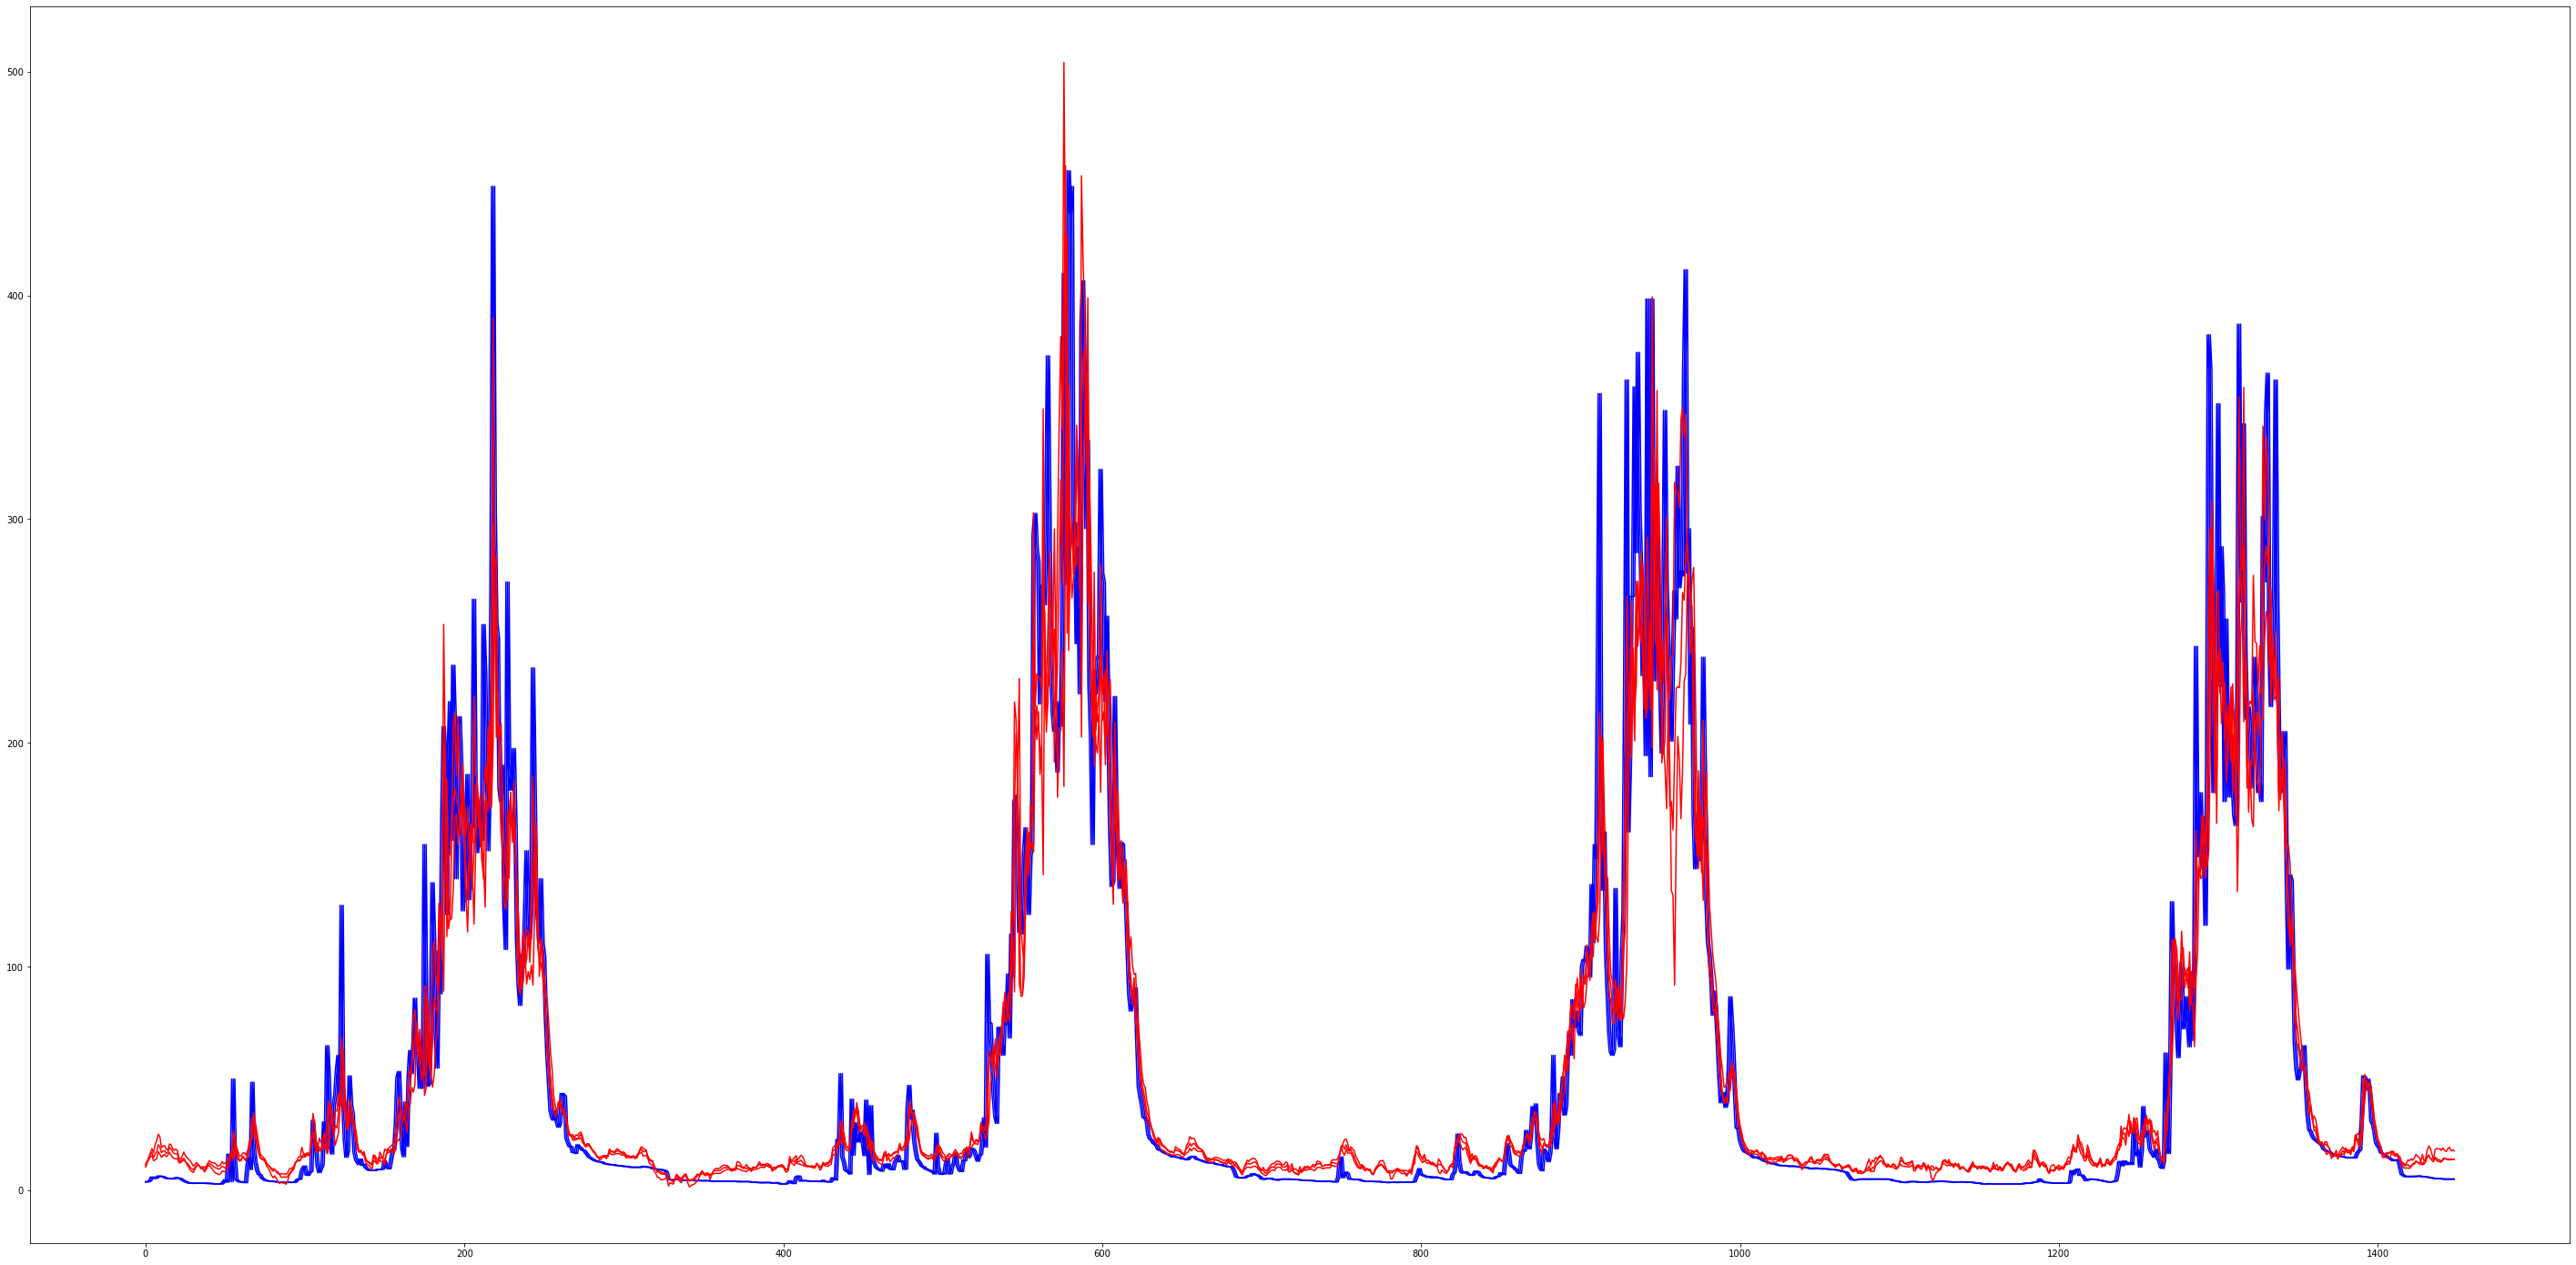

In [ ]:
print('inv_y2 (OBS) max:',np.max(inv_y2),' versus inv_yhat2 (SIM) max:',np.max(inv_yhat2))
plt.figure(figsize=(50,25))
plt.plot(inv_y2, color='blue')
plt.plot(inv_yhat2,color='red')
plt.show()

#2. In this part I have developed an encoder-decoder setting where I have given a zero input for the decoder with shape(samples,num-time-steps-out, output-features) unlike the previous case of teacher forcing.

In [71]:
# The Encoder
encoder_inputs = keras.layers.Input(shape=(None, num_input_features))

encoder_cells = []
for hidden_neurons in layers:
    encoder_cells.append(keras.layers.GRUCell(hidden_neurons,
                                              kernel_regularizer=regulariser,
                                              recurrent_regularizer=regulariser,
                                              bias_regularizer=regulariser))
    #Stacked LSTM
    # encoder_cells.append(keras.layers.LSTMCell(hidden_neurons,
    #                                           kernel_regularizer=regulariser,
    #                                           recurrent_regularizer=regulariser,
    #                                           bias_regularizer=regulariser))
    

encoder = keras.layers.RNN(encoder_cells, return_state=True)

encoder_outputs_and_states = encoder(encoder_inputs)

encoder_states = encoder_outputs_and_states[1:]

In [72]:
# The decoder 
decoder_inputs = keras.layers.Input(shape=(None, 1))

decoder_cells = []
for hidden_neurons in layers:
    decoder_cells.append(keras.layers.GRUCell(hidden_neurons,
                                              kernel_regularizer=regulariser,
                                              recurrent_regularizer=regulariser,
                                              bias_regularizer=regulariser))
    #Stacked LSTM
    # decoder_cells.append(keras.layers.LSTMCell(hidden_neurons,
    #                                           kernel_regularizer=regulariser,
    #                                           recurrent_regularizer=regulariser,
    #                                           bias_regularizer=regulariser))

decoder = keras.layers.RNN(decoder_cells, return_sequences=True, return_state=True)

decoder_outputs_and_states = decoder(decoder_inputs, initial_state=encoder_states)

decoder_outputs = decoder_outputs_and_states[0]

# dropout = Dropout(rate=0.25)
# decoder_outputs = dropout(decoder_outputs)

decoder_dense = keras.layers.Dense(num_output_features,
                                   activation='linear',
                                   kernel_regularizer=regulariser,
                                   bias_regularizer=regulariser)

decoder_outputs = decoder_dense(decoder_outputs)

#These are the decoder input values which are set as zero. Since the decoder has sequence length of out-seq-length (which is 3 in this case) and the output feature size is also one (the target streamflow). Thus the shape of the decoder input will be (batchsize, out-seq-length,num_output_features). But zero is the not a correct way to select an intial token for decoder input since zero is part of our trining or time series data. It is better to select some other value which is not found in training dataset.

-1 is used rather than zero but you can try any value which is not part of the training data.

In [ ]:
train_decoder_input_data = np.ones((8172,  3, 1))
train_decoder_input_data= np.negative(train_decoder_input_data)
val_decoder_input_data = np.ones((1021,  3, 1))
val_decoder_input_data = np.negative(val_decoder_input_data)
test_decoder_input_data = np.ones((1022,  3, 1))
test_decoder_input_data = np.negative(test_decoder_input_data)

In [64]:
train_decoder_input_data = np.zeros((7293,  3, 1))
val_decoder_input_data = np.zeros((1449,  3, 1))
test_decoder_input_data = np.zeros((1449,  3, 1))

#In the following cells an Encoder-Decoder impelementation using Bidirectional LSTM is demonstrated. The input to the decoder is zero/-1.

In [100]:
# The encoder
encoder_inputs = Input(shape=(input_sequence_length, num_input_features), name='encoder_inputs')

#encoder_lstm1 = Bidirectional(LSTM(100,return_state=True,return_sequences=True))
encoder_lstm1 = Bidirectional(GRU(100,return_state=True,return_sequences=True))
#encoder_lstm1_output,forward_h1,forward_c1,backward_h1,backward_c1 = encoder_lstm1(encoder_inputs) # For LSTM based
encoder_lstm1_output,forward_h1,backward_h1= encoder_lstm1(encoder_inputs) # For GRU based

#encoder_lstm2 = Bidirectional(LSTM(100,return_state=True))
encoder_lstm2 = Bidirectional(GRU(100,return_state=True))
#encoder_lstm2_output,forward_h2,forward_c2,backward_h2,backward_c2 = encoder_lstm2(encoder_lstm1_output)
encoder_lstm2_output,forward_h2,backward_h2= encoder_lstm2(encoder_lstm1_output)



#states = [forward_h2,forward_c2,backward_h2,backward_c2]
states = [forward_h2,backward_h2]



#The Decoder part 
decoder_inputs = keras.layers.Input(shape=(None, 1))


#decoder_lstm1 = Bidirectional(LSTM(100,return_state=True,return_sequences=True))
decoder_lstm1 = Bidirectional(GRU(100,return_state=True,return_sequences=True))
#decoder_lstm1_output,forward_h1,forward_c1,backward_h1,backward_c1 = decoder_lstm1(decoder_inputs,initial_state=states)
decoder_lstm1_output,forward_h1,backward_h1 = decoder_lstm1(decoder_inputs,initial_state=states)

#decoder_lstm2 = Bidirectional(LSTM(100,return_state=True,return_sequences=True))
#decoder_lstm2 = Bidirectional(GRU(100,return_state=True,return_sequences=True))
#decoder_lstm2_output,forward_h2,forward_c2,backward_h2,backward_c2 = decoder_lstm2(decoder_lstm1_output)
#decoder_lstm2_output,forward_h2,backward_h2 = decoder_lstm2(decoder_lstm1_output)

decoder_outputs = decoder_lstm1_output

dropout = Dropout(rate=0.25)
decoder_outputs = dropout(decoder_outputs)

decoder_dense = keras.layers.Dense(num_output_features,
                                  activation='linear',
                                  kernel_regularizer=regulariser,
                                  bias_regularizer=regulariser)


decoder_outputs = decoder_dense(decoder_outputs)


#Training the Model

In [101]:
model = keras.models.Model(inputs=[encoder_inputs, decoder_inputs], outputs=decoder_outputs)
#model.summary()
model.compile(optimizer=optimiser, loss=loss)

In [102]:
history2 = model.fit([train_X2,train_decoder_input_data], train_y2, epochs=50, batch_size=100, validation_data=([val_X2,val_decoder_input_data], val_y2), verbose=1, shuffle=False)

Epoch 1/50
73/73 [==============================] - 10s 36ms/step - loss: 0.0277 - val_loss: 0.0016
Epoch 2/50
73/73 [==============================] - 1s 14ms/step - loss: 0.0025 - val_loss: 0.0010
Epoch 3/50
73/73 [==============================] - 1s 14ms/step - loss: 0.0021 - val_loss: 9.2723e-04
Epoch 4/50
73/73 [==============================] - 1s 14ms/step - loss: 0.0019 - val_loss: 8.5716e-04
Epoch 5/50
73/73 [==============================] - 1s 14ms/step - loss: 0.0018 - val_loss: 8.1361e-04
Epoch 6/50
73/73 [==============================] - 1s 14ms/step - loss: 0.0017 - val_loss: 7.6250e-04
Epoch 7/50
73/73 [==============================] - 1s 15ms/step - loss: 0.0016 - val_loss: 7.4273e-04
Epoch 8/50
73/73 [==============================] - 1s 14ms/step - loss: 0.0016 - val_loss: 7.4818e-04
Epoch 9/50
73/73 [==============================] - 1s 14ms/step - loss: 0.0016 - val_loss: 7.3455e-04
Epoch 10/50
73/73 [==============================] - 1s 14ms/step - loss: 0.0016

#Plot the loss curve of the model

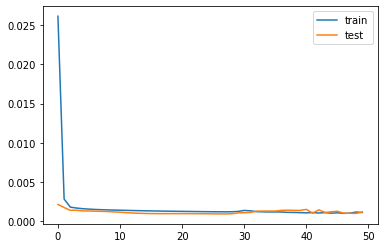

In [ ]:
plt.plot(history2.history['loss'], label='train')
plt.plot(history2.history['val_loss'], label='test')
plt.legend()
plt.show()

#Prediction result on test dataset

In [103]:
y_test_predicted = model.predict([test_X2,test_decoder_input_data])
pred= tf.reshape(y_test_predicted, [1449, 3])
orig=tf.reshape(test_y2, [1449, 3])
inv_yhat2 = scaler_Y.inverse_transform(pred)
inv_y2 = scaler_Y.inverse_transform(orig)

#RMSE, MAE and NSE score values for individual days and the cummulative value for (t+n) prediciton days

In [104]:
score, scores = evaluate_forecasts_mse(inv_y2, inv_yhat2)
score, scores

(27.43, [26.02, 26.43, 29.68])

In [105]:
score, scores = evaluate_forecasts_mae(inv_y2, inv_yhat2)
score, scores

(13.49, [12.58, 12.89, 15.02])

In [106]:
score, scores = evaluate_forecasts_nse(inv_y2, inv_yhat2)
score, scores

(0.90, [0.91, 0.91, 0.88])

#Ploting prediction result Vs actual value

inv_y2 (OBS) max: 455.70602  versus inv_yhat2 (SIM) max: 331.80984


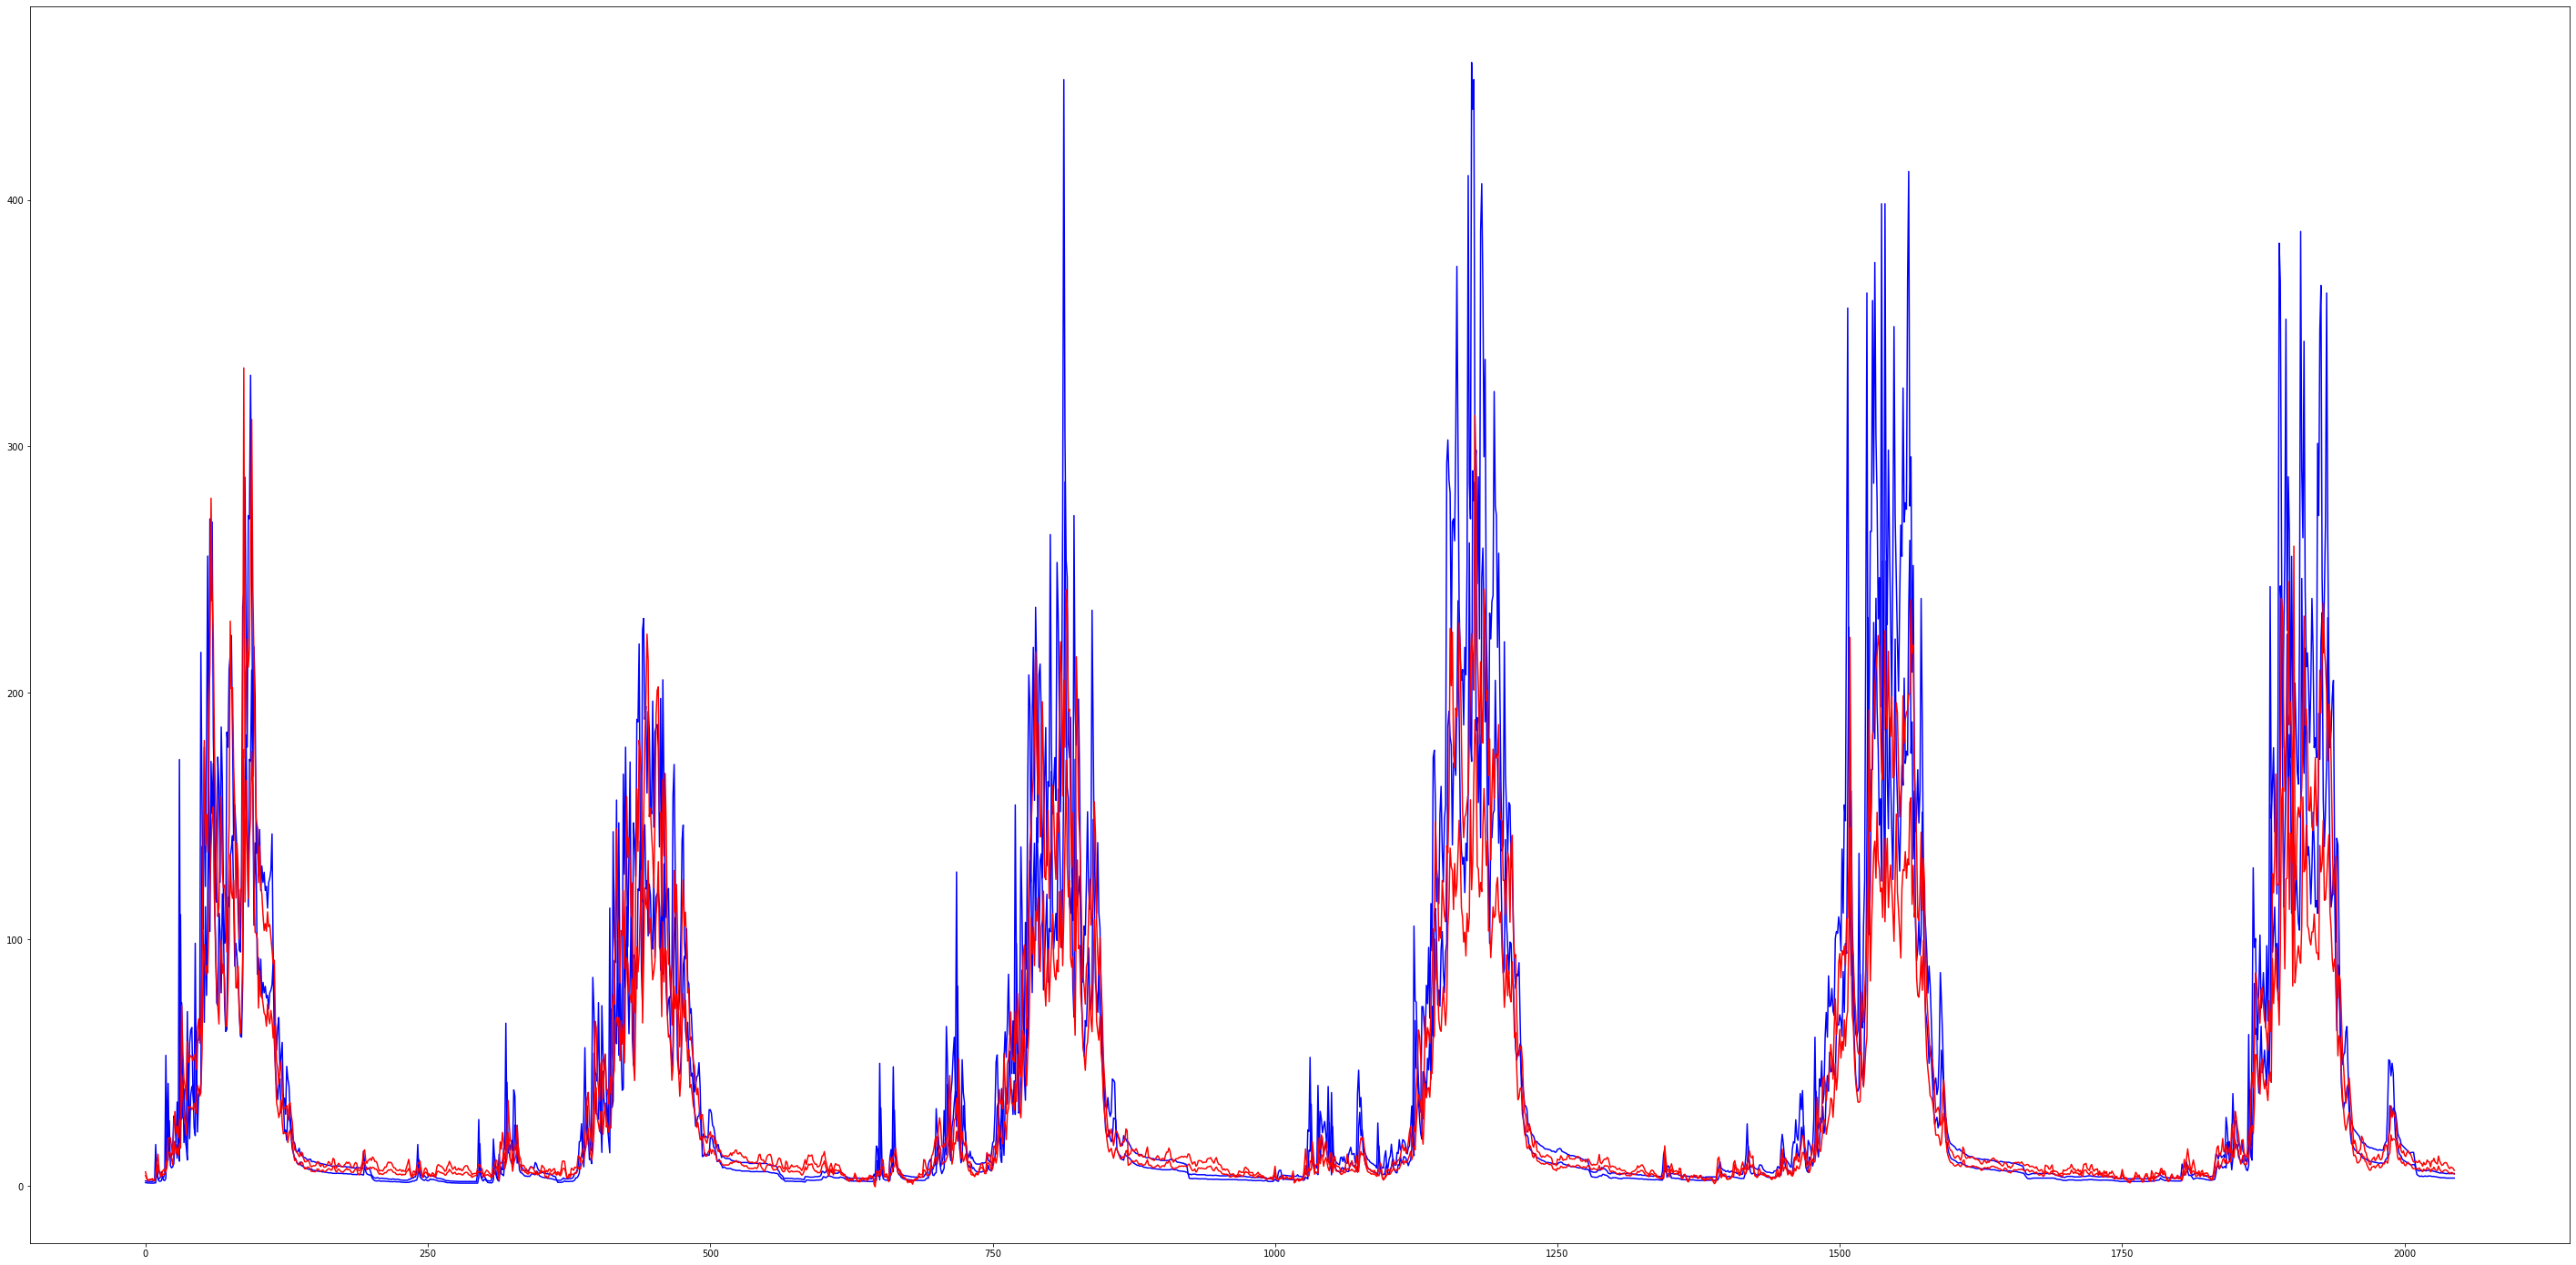

In [ ]:
print('inv_y2 (OBS) max:',np.max(inv_y2),' versus inv_yhat2 (SIM) max:',np.max(inv_yhat2))
plt.figure(figsize=(50,25))
plt.plot(inv_y2, color='blue')
plt.plot(inv_yhat2,color='red')
plt.show()

#3. In this part an encoder-decoder model for multi step decoder output is developed but this time the decoder initial token will be the last encoder output (after being given to dense layer). The input for the next time steps of the decoder will be the previous decoder output. Single layer LSTM is used rather than stacked GRU cells.

In [56]:
def _create_stacked_rnn_cells():
    """
   Create a `layers_stacked_count` amount of GRU cells and stack them on top of each other.
   They have a `hidden_dim` number of neuron layer size.

   :param step: The base Neuraxle step for TensorFlow v2 (Tensorflow2ModelStep)
    :return: list of gru cells
    """
    cells = []
    for _ in range(2): # modifiy this one
        cells.append(GRUCell(100, kernel_regularizer=regulariser, recurrent_regularizer=regulariser, bias_regularizer=regulariser))
        #cells.append(LSTMCell(100, kernel_regularizer=regulariser, recurrent_regularizer=regulariser, bias_regularizer=regulariser))
    
    return cells

In [64]:
def create_hard_coded_decoder_input_model(batch_size):
  # The encoder
  encoder_inputs = Input(shape=(input_sequence_length, num_input_features), name='encoder_inputs')
  encoder_lstm = RNN(cell=_create_stacked_rnn_cells(),  return_state=True)
  #encoder_lstm = LSTM(100, return_state=True,  name='encoder_lstm')
  #encoder_lstm = GRU(100, return_state=True,  name='encoder_lstm')
  encoder_outputs, state_h, state_c = encoder_lstm(encoder_inputs)  # for single layer LSTM and RNN cells (both LSTM and GRU)
  #encoder_outputs, state_h = encoder_lstm(encoder_inputs) # for single layer GRU

  encoder_output_densed = Dense(num_output_features,  name='encoder_dense')(encoder_outputs)
    
  decoder_input_data = tf.expand_dims(encoder_output_densed, axis=1)

  states = [state_h, state_c]    # for single layer LSTM and RNN cells (both LSTM and GRU)
  #states = [state_h]            #for single layer GRU
 
  # The decoder part
  decoder_inputs = Input(shape=(1, num_output_features))
  
  decoder_lstm = RNN(cell=_create_stacked_rnn_cells(), return_sequences=True, return_state=True)
  #decoder_lstm = LSTM(100, return_sequences=True, return_state=True, name='decoder_lstm')
  #decoder_lstm = GRU(100, return_sequences=True, return_state=True, name='decoder_lstm')
  
  decoder_dense = Dense(num_output_features,  name='decoder_dense')
  
  all_outputs = []

  inputs = decoder_input_data

  sequence_length = 3
  for _ in range(sequence_length):
      
      outputs, state_h, state_c = decoder_lstm(inputs, initial_state=states) # for single layer STM and RNN cells (both LSTM and GRU)
      #outputs, state_h = decoder_lstm(inputs, initial_state=states)       # for single layer GRU
      
      # dropout = Dropout(rate=0.25)
      # outputs = dropout(outputs)

      outputs = decoder_dense(outputs)
      all_outputs.append(outputs)

      inputs = outputs
      states = [state_h, state_c]    # for single layer STM and RNN cells (both LSTM and GRU)
      #states = [state_h]    # for single layer GRU
      
  decoder_outputs = Lambda(lambda x: K.concatenate(x, axis=1))(all_outputs)

  model = Model(encoder_inputs, decoder_outputs, name='model_encoder_decoder')
  model.compile(optimizer=optimiser, loss='mse', metrics=['accuracy'])
  return model

#In the following cells an Encoder-Decoder impelementation using Bidirectional LSTM/GRU is demonstrated. The input to the decoder is last encoder output after being densed.

In [64]:
def create_hard_coded_decoder_input_model(batch_size):
  # The encoder
  encoder_inputs = Input(shape=(input_sequence_length, num_input_features), name='encoder_inputs')

  #encoder_lstm1 = Bidirectional(LSTM(100,return_state=True,return_sequences=True))
  encoder_lstm1 = Bidirectional(GRU(100,return_state=True,return_sequences=True))
  #encoder_lstm1_output,forward_h1,forward_c1,backward_h1,backward_c1 = encoder_lstm1(encoder_inputs) # For LSTM based
  encoder_lstm1_output,forward_h1,backward_h1= encoder_lstm1(encoder_inputs) # For GRU based

  #encoder_lstm2 = Bidirectional(LSTM(100,return_state=True,return_sequences=False))
  encoder_lstm2 = Bidirectional(GRU(100,return_state=True,return_sequences=False))
  #encoder_lstm2_output,forward_h2,forward_c2,backward_h2,backward_c2 = encoder_lstm2(encoder_lstm1_output)
  encoder_lstm2_output,forward_h2,backward_h2= encoder_lstm2(encoder_lstm1_output)

  encoder_output_densed = Dense(num_output_features,  name='encoder_dense')(encoder_lstm2_output)
  

  decoder_input_data = tf.expand_dims(encoder_output_densed, axis=1)
  
  #states = [forward_h2,forward_c2,backward_h2,backward_c2]
  states = [forward_h2,backward_h2]

  #The Decoder part 
  decoder_inputs=Input(shape=(1, num_output_features), name='encoder_inputs')


  decoder_lstm1 = Bidirectional(GRU(100,return_state=True,return_sequences=True))
  #decoder_lstm1 = Bidirectional(LSTM(100,return_state=True,return_sequences=True))


  decoder_dense = Dense(num_output_features, activation='linear',  kernel_regularizer=regulariser, bias_regularizer=regulariser, name='decoder_dense')

  all_outputs = []
  inputs = decoder_input_data

  sequence_length = 3
  for _ in range(sequence_length):
      
      outputs, forward_state_h, backward_state_h = decoder_lstm1(inputs, initial_state=states)
      #outputs, forward_h,forward_c,backward_h,backward_c = decoder_lstm1(inputs, initial_state=states)
      
      # dropout = Dropout(rate=0.25)
      # outputs = dropout(outputs)

      outputs = decoder_dense(outputs)
      all_outputs.append(outputs)
      inputs = outputs
      states = [forward_state_h, backward_state_h]
      #states = [forward_h,forward_c,backward_h,backward_c]
      

  decoder_outputs = Lambda(lambda x: K.concatenate(x, axis=1))(all_outputs)

  model = Model(encoder_inputs, decoder_outputs, name='model_encoder_decoder')
  model.compile(optimizer=optimiser, loss='mse', metrics=['accuracy'])
  return model


#Training the Model 

In [65]:
model=create_hard_coded_decoder_input_model(batch_size=batch_size)
#model_encoder_decoder.summary()

In [66]:
history2 = model.fit(train_X2, train_y2, epochs=50, batch_size=100, validation_data=(val_X2, val_y2), verbose=1, shuffle=False)

Epoch 1/50
73/73 [==============================] - 17s 54ms/step - loss: 0.0338 - accuracy: 2.7424e-04 - val_loss: 0.0021 - val_accuracy: 0.0000e+00
Epoch 2/50
73/73 [==============================] - 1s 20ms/step - loss: 0.0030 - accuracy: 2.7424e-04 - val_loss: 0.0011 - val_accuracy: 0.0000e+00
Epoch 3/50
73/73 [==============================] - 1s 20ms/step - loss: 0.0020 - accuracy: 3.6565e-04 - val_loss: 8.7016e-04 - val_accuracy: 0.0000e+00
Epoch 4/50
73/73 [==============================] - 1s 20ms/step - loss: 0.0018 - accuracy: 3.6565e-04 - val_loss: 8.2783e-04 - val_accuracy: 0.0000e+00
Epoch 5/50
73/73 [==============================] - 1s 19ms/step - loss: 0.0017 - accuracy: 3.6565e-04 - val_loss: 8.0402e-04 - val_accuracy: 0.0000e+00
Epoch 6/50
73/73 [==============================] - 1s 19ms/step - loss: 0.0017 - accuracy: 3.6565e-04 - val_loss: 8.6919e-04 - val_accuracy: 0.0000e+00
Epoch 7/50
73/73 [==============================] - 1s 20ms/step - loss: 0.0017 - accurac

#Plotting the loss curve

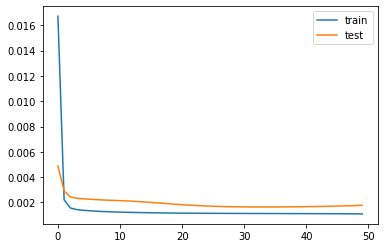

In [ ]:
plt.plot(history2.history['loss'], label='train')
plt.plot(history2.history['val_loss'], label='test')
plt.legend()
plt.show()

#Prediction result on test dataset

In [67]:
y_test_predicted = model.predict(test_X2)
pred= tf.reshape(y_test_predicted, [1449, 3])
orig=tf.reshape(test_y2, [1449, 3])

inv_yhat2 = scaler_Y.inverse_transform(pred)
inv_y2 = scaler_Y.inverse_transform(orig)

#RMSE, MAE and NSE score values for individual days and the cummulative value for (t+n) prediciton days

In [68]:
score, scores = evaluate_forecasts_mse(inv_y2, inv_yhat2)
score, scores

(27.13, [24.93, 26.50, 29.72])

In [69]:
score, scores = evaluate_forecasts_mae(inv_y2, inv_yhat2)
score, scores

(13.58, [13.14, 13.10, 14.51])

In [70]:
score, scores = evaluate_forecasts_nse(inv_y2, inv_yhat2)
score, scores

(0.90, [0.92, 0.91, 0.88])

#Ploting prediction result Vs actual value

inv_y2 (OBS) max: 455.70602  versus inv_yhat2 (SIM) max: 292.93933


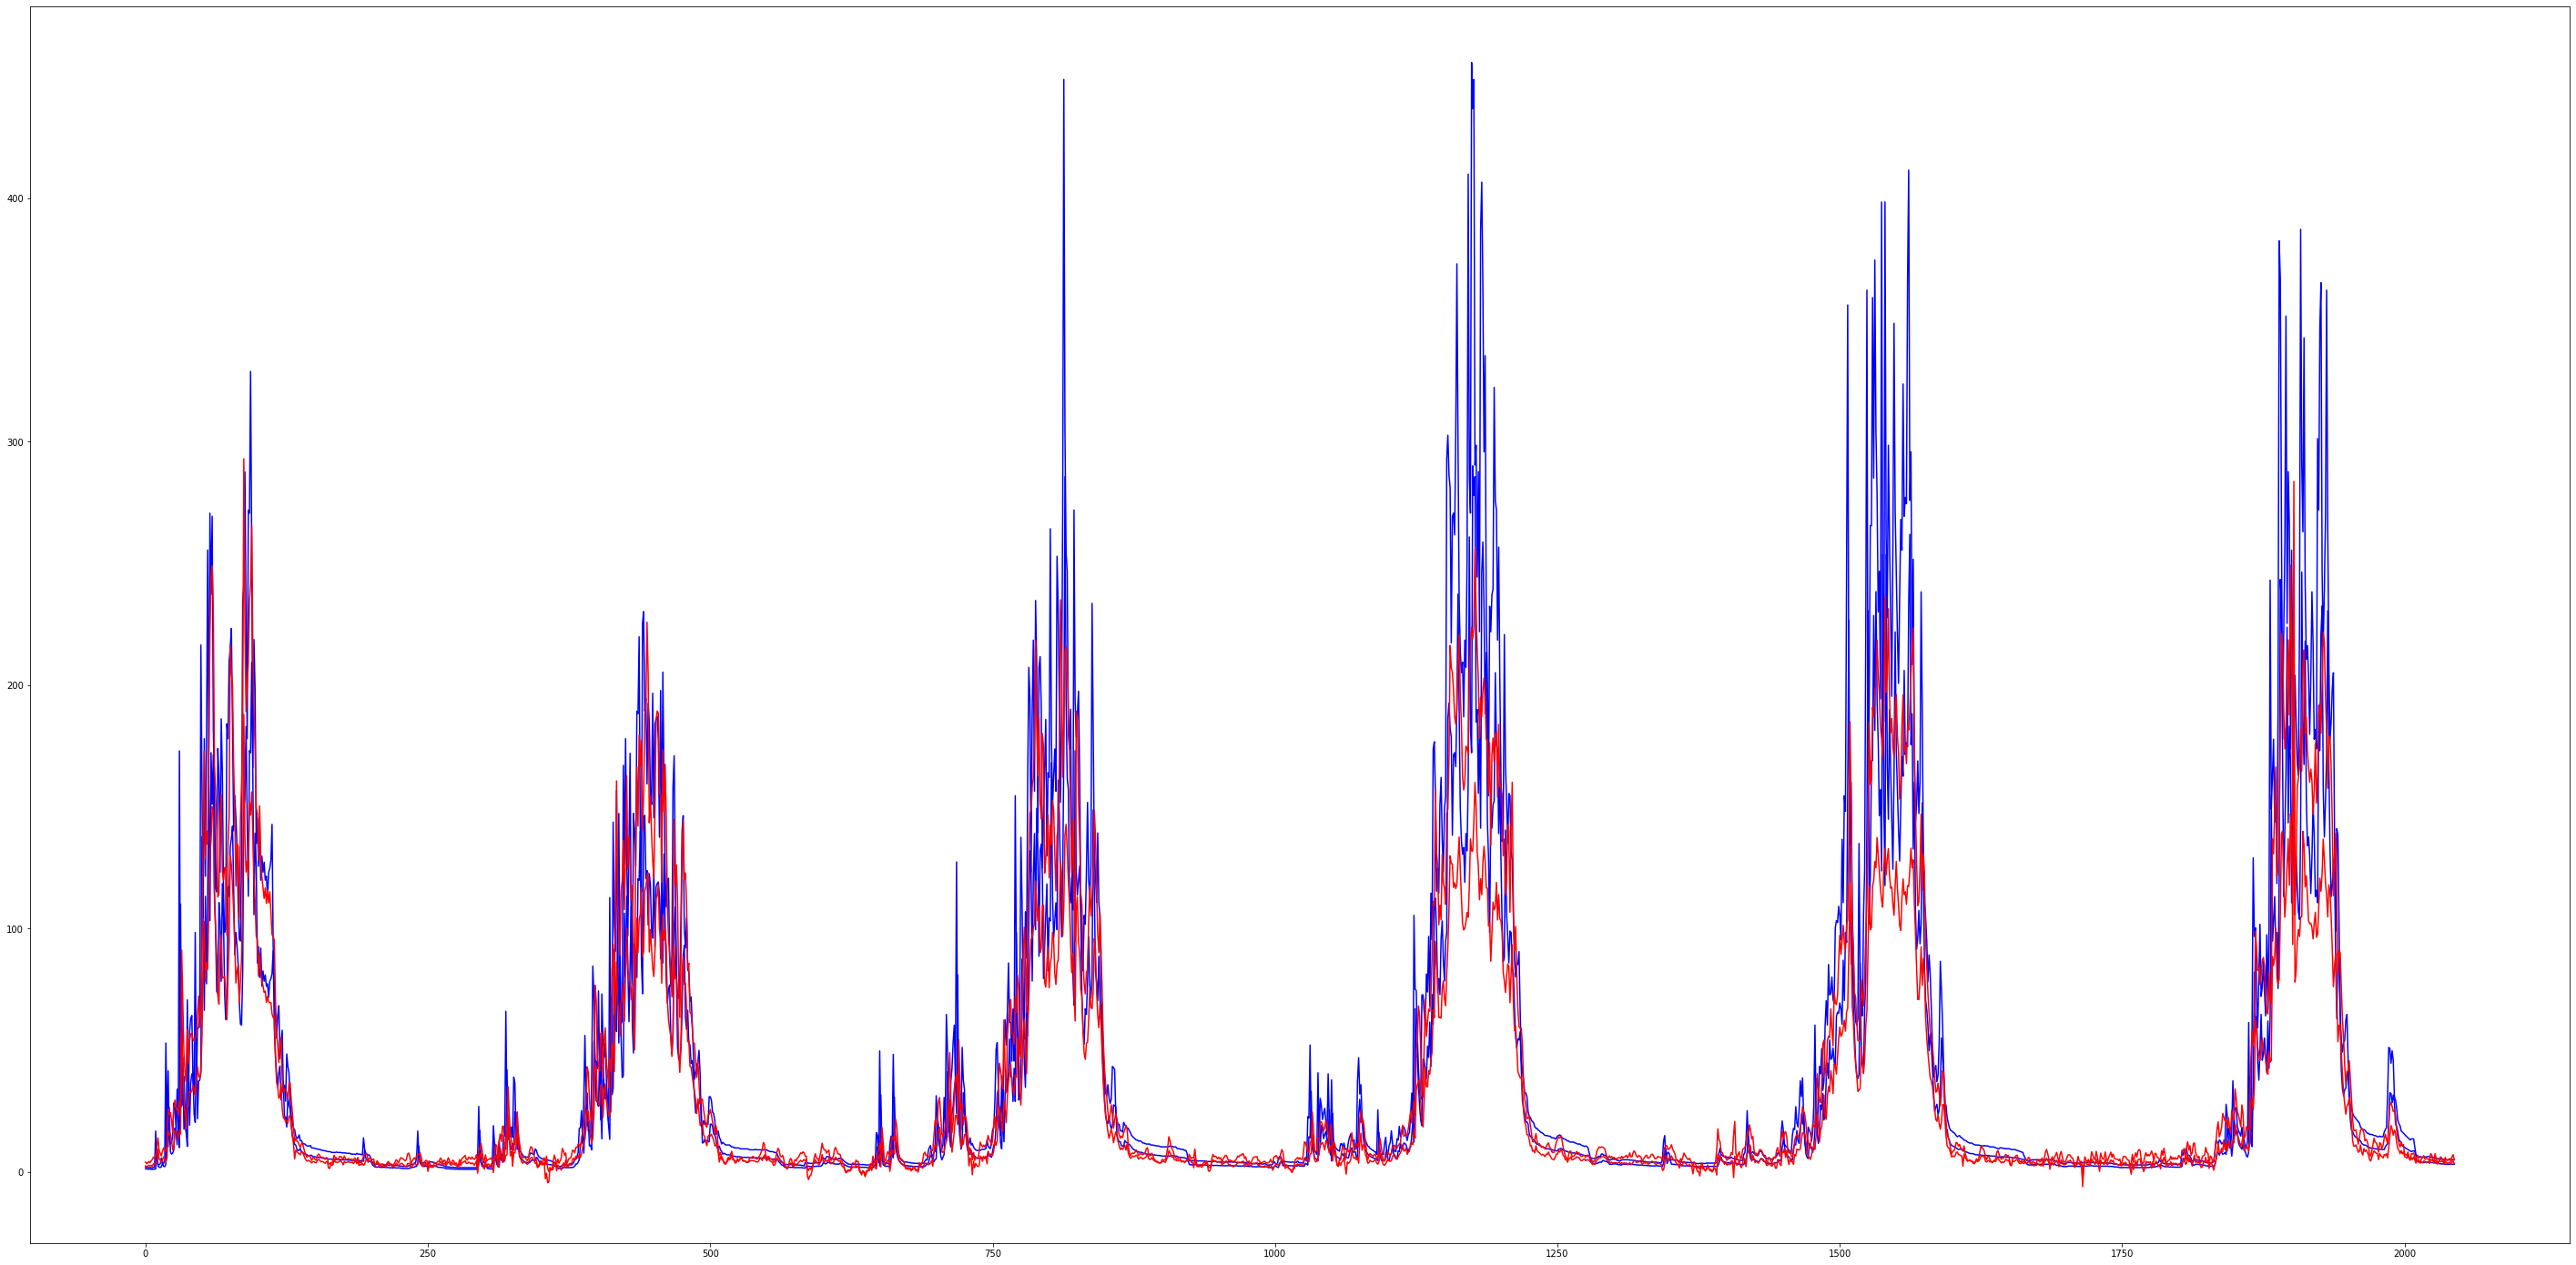

In [ ]:
print('inv_y2 (OBS) max:',np.max(inv_y2),' versus inv_yhat2 (SIM) max:',np.max(inv_yhat2))
plt.figure(figsize=(50,25))
plt.plot(inv_y2, color='blue')
plt.plot(inv_yhat2,color='red')
plt.show()

#4. In this part an encoder-decoder model is developed where the last encoder output is used as an encoder input at all decoder output timesteps. The encoder output is repeated based on the number of output sequence length. Then the repeated encoder output will be fed as an input to the decoder.

#This function is used to create a stacked GRU cells.

In [90]:
def _create_stacked_rnn_cells():
    """
   Create a `layers_stacked_count` amount of GRU cells and stack them on top of each other.
   They have a `hidden_dim` number of neuron layer size.

   :param step: The base Neuraxle step for TensorFlow v2 (Tensorflow2ModelStep)
    :return: list of gru cells
    """
    cells = []
    for _ in range(2): # modifiy this one
        cells.append(GRUCell(100, kernel_regularizer=regulariser, recurrent_regularizer=regulariser, bias_regularizer=regulariser))
        #cells.append(LSTMCell(100, kernel_regularizer=regulariser, recurrent_regularizer=regulariser, bias_regularizer=regulariser))
    
    return cells

In [99]:
def create_hard_coded_decoder_input_model(batch_size):
  # The encoder
  encoder_inputs = Input(shape=(input_sequence_length, num_input_features), name='encoder_inputs')
  encoder_lstm = RNN(cell=_create_stacked_rnn_cells(),  return_state=True)
  #encoder_lstm = LSTM(100, return_state=True,  name='encoder_lstm')
  #encoder_lstm = GRU(100, return_state=True,  name='encoder_lstm')
  encoder_outputs, state_h, state_c = encoder_lstm(encoder_inputs)  # for single layer LSTM and RNN cells (both LSTM and GRU)
  #encoder_outputs, state_h = encoder_lstm(encoder_inputs) # for single layer GRU


  last_encoder_output = tf.expand_dims(encoder_outputs, axis=1)
 
  replicated_last_encoder_output = tf.repeat(
        input=last_encoder_output,
        repeats=3, # This value will be changed based on the size of the decoder output sequence length
        axis=1
    )

  states = [state_h, state_c]    # for single layer LSTM and RNN cells (both LSTM and GRU)
  #states = [state_h]            #for single layer GRU
 
  # The decoder part
  decoder_inputs = Input(shape=(1, num_output_features))
  
  decoder_lstm = RNN(cell=_create_stacked_rnn_cells(), return_sequences=True, return_state=True)
  #decoder_lstm = LSTM(100, return_sequences=True, return_state=True, name='decoder_lstm')
  #decoder_lstm = GRU(100, return_sequences=True, return_state=True, name='decoder_lstm')

  outputs, state_h, state_c = decoder_lstm(replicated_last_encoder_output, initial_state=states) # for single layer STM and RNN cells (both LSTM and GRU)
  #outputs, state_h = decoder_lstm(replicated_last_encoder_output, initial_state=states)       # for single layer GRU
  
  decoder_dense = Dense(num_output_features,  name='decoder_dense')

  # dropout = Dropout(rate=0.25)
  # outputs = dropout(outputs)

  decoder_outputs = decoder_dense(outputs)
  

  model = Model(encoder_inputs, decoder_outputs, name='model_encoder_decoder')
  model.compile(optimizer=optimiser, loss='mse', metrics=['accuracy'])
  return model

# By applying Bi-LSTM/GRU architecture for multivariate multi-step prediction task

In [128]:
def create_hard_coded_decoder_input_model(batch_size):
  # The encoder
  encoder_inputs = Input(shape=(input_sequence_length, num_input_features), name='encoder_inputs')

  encoder_lstm1 = Bidirectional(LSTM(100,return_state=True,return_sequences=True))
  #encoder_lstm1 = Bidirectional(GRU(100,return_state=True,return_sequences=True))
  encoder_lstm1_output,forward_h1,forward_c1,backward_h1,backward_c1 = encoder_lstm1(encoder_inputs) # For LSTM based
  #encoder_lstm1_output,forward_h1,backward_h1= encoder_lstm1(encoder_inputs) # For GRU based

  encoder_lstm2 = Bidirectional(LSTM(100,return_state=True,return_sequences=False))
  #encoder_lstm2 = Bidirectional(GRU(100,return_state=True,return_sequences=False))
  encoder_lstm2_output,forward_h2,forward_c2,backward_h2,backward_c2 = encoder_lstm2(encoder_lstm1_output)
  #encoder_lstm2_output,forward_h2,backward_h2= encoder_lstm2(encoder_lstm1_output)


  last_encoder_output = tf.expand_dims(encoder_lstm2_output, axis=1)
  
  replicated_last_encoder_output = tf.repeat(
        input=last_encoder_output,
        repeats=3, # The number of repeatitions will be dependent on the decoder output sequence length
        axis=1
    )



  states = [forward_h2,forward_c2,backward_h2,backward_c2]
  #states = [forward_h2,backward_h2]

  #The Decoder part 
  decoder_inputs=Input(shape=(1, num_output_features), name='encoder_inputs')

  #decoder_lstm1 = Bidirectional(GRU(100,return_state=True,return_sequences=True))
  decoder_lstm1 = Bidirectional(LSTM(100,return_state=True,return_sequences=True))

  decoder_dense = Dense(num_output_features, activation='linear',  kernel_regularizer=regulariser, bias_regularizer=regulariser, name='decoder_dense')

  #outputs, forward_state_h, backward_state_h = decoder_lstm1(replicated_last_encoder_output, initial_state=states)
  outputs, forward_h,forward_c,backward_h,backward_c = decoder_lstm1(replicated_last_encoder_output, initial_state=states)

  
  # dropout = Dropout(rate=0.25)
  # outputs = dropout(outputs)

  decoder_outputs = decoder_dense(outputs)

  model = Model(encoder_inputs, decoder_outputs, name='model_encoder_decoder')
  model.compile(optimizer=optimiser, loss='mse', metrics=['accuracy'])
  return model


#Training the Model

In [129]:
model=create_hard_coded_decoder_input_model(batch_size=batch_size)
#model.summary()

In [130]:
history2 = model.fit(train_X2, train_y2, epochs=50, batch_size=100, validation_data=(val_X2, val_y2), verbose=1, shuffle=False)

Epoch 1/50
73/73 [==============================] - 11s 42ms/step - loss: 0.0546 - accuracy: 2.7424e-04 - val_loss: 0.0015 - val_accuracy: 0.0000e+00
Epoch 2/50
73/73 [==============================] - 1s 15ms/step - loss: 0.0024 - accuracy: 3.6565e-04 - val_loss: 0.0012 - val_accuracy: 0.0000e+00
Epoch 3/50
73/73 [==============================] - 1s 15ms/step - loss: 0.0021 - accuracy: 3.6565e-04 - val_loss: 0.0012 - val_accuracy: 0.0000e+00
Epoch 4/50
73/73 [==============================] - 1s 15ms/step - loss: 0.0020 - accuracy: 3.6565e-04 - val_loss: 0.0010 - val_accuracy: 0.0000e+00
Epoch 5/50
73/73 [==============================] - 1s 16ms/step - loss: 0.0019 - accuracy: 3.6565e-04 - val_loss: 9.4042e-04 - val_accuracy: 0.0000e+00
Epoch 6/50
73/73 [==============================] - 1s 20ms/step - loss: 0.0018 - accuracy: 3.6565e-04 - val_loss: 8.7160e-04 - val_accuracy: 0.0000e+00
Epoch 7/50
73/73 [==============================] - 2s 21ms/step - loss: 0.0018 - accuracy: 3.656

#Plotting the loss curve

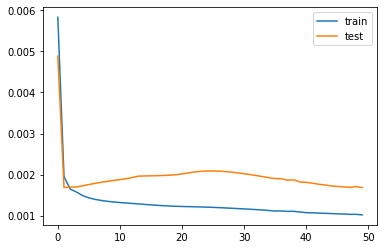

In [ ]:
plt.plot(history2.history['loss'], label='train')
plt.plot(history2.history['val_loss'], label='test')
plt.legend()
plt.show()

#Prediction result on test dataset

In [131]:
y_test_predicted = model.predict(test_X2)
pred= tf.reshape(y_test_predicted, [1449, 3])
orig=tf.reshape(test_y2, [1449, 3])

inv_yhat2 = scaler_Y.inverse_transform(pred)
inv_y2 = scaler_Y.inverse_transform(orig)

#RMSE, MAE and NSE score values for individual days and the cummulative value for (t+n) prediciton days

In [132]:
score, scores = evaluate_forecasts_mse(inv_y2, inv_yhat2)
score, scores

(28.53, [28.19, 27.21, 30.11])

In [133]:
score, scores = evaluate_forecasts_mae(inv_y2, inv_yhat2)
score, scores

(14.71, [13.81, 14.39, 15.93])

In [134]:
score, scores = evaluate_forecasts_nse(inv_y2, inv_yhat2)
score, scores

(0.89, [0.89, 0.90, 0.88])

#Ploting prediction result Vs actual value

In [ ]:
print('inv_y2 (OBS) max:',np.max(inv_y2),' versus inv_yhat2 (SIM) max:',np.max(inv_yhat2))
plt.figure(figsize=(50,25))
plt.plot(inv_y2, color='blue')
plt.plot(inv_yhat2,color='red')
plt.show()